# Telecom Churn Case Study

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Business Goal
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Importing Modules and Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML

from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision

warnings.filterwarnings('ignore')

In [2]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve, recall_score

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

# Importing required packages for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz


# Other sklearn packages
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier

from datetime import date,datetime
import math
import multiprocessing

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
DF=pd.read_csv('telecom_churn_data.csv')
DF.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,Na

In [5]:
DF.shape

(99999, 226)

In [6]:
DF.info(verbose=1)
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
#checking how the data is spread
DF.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",

In [8]:
# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in DF.columns if column not in id_cols + date_cols + cat_cols]

In [9]:
# The number of columns in each list
print("--> ID cols: %d\n--> Date cols:%d\n--> Numeric cols:%d\n--> Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

--> ID cols: 2
--> Date cols:12
--> Numeric cols:204
--> Category cols:8


  **********************************************************************  

# DATA CLEANING

In [10]:
# Checking missing values percentages
pd.set_option('display.max_rows', None)
telecom_null_check = 100*DF.isnull().sum()/len(DF)
df = pd.DataFrame(telecom_null_check)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df.sort_values('Null_Percentage', ascending=False)

,Null_Percentage
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


As we can see here there are columns with as high as 74.85 % of missing values. So we consider 70% and remove the columns having missing values more than 70%.

In [11]:
# Null columns list
Missing_Vals_Column_70=list(df.index[df['Null_Percentage'] > 70])
(Missing_Vals_Column_70)

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

However we will exclued the columns related to Max_recharge, total_recharge data and avg recharge amount data as these columns might provide us with some insight.

In [12]:
# Removing the columns as per above condition
Missing_Vals_Column_70=DF.columns[round(100*DF.isnull().sum()/len(DF),2)> 70]
data_col=['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
Missing_Vals_Column_70=[col for col in Missing_Vals_Column_70 if col not in data_col]
DF=DF.drop(Missing_Vals_Column_70,axis=1)
DF.shape

(99999, 198)

In [13]:
# Checking missing values percentages again
def NULL_CHECK(X):
    pd.set_option('display.max_rows', None)
    telecom_null_check_2 = 100*X.isnull().sum()/len(X)
    df = pd.DataFrame(telecom_null_check_2)
    df.rename(columns={0:'Null_Percentage'}, inplace=True)
    return df.sort_values('Null_Percentage', ascending=False)

NULL_CHECK(DF)

,Null_Percentage
av_rech_amt_data_6,74.85
max_rech_data_6,74.85
total_rech_data_6,74.85
max_rech_data_7,74.43
total_rech_data_7,74.43
av_rech_amt_data_7,74.43
max_rech_data_9,74.08
total_rech_data_9,74.08
av_rech_amt_data_9,74.08
max_rech_data_8,73.66


In [14]:
# # Convert mobile number to object so that it does not interfare with out visualizations
# DF['mobile_number']=DF['mobile_number'].astype('object')
# DF['mobile_number'].head()

In [15]:
NULL_CHECK(DF)

,Null_Percentage
av_rech_amt_data_6,74.85
max_rech_data_6,74.85
total_rech_data_6,74.85
max_rech_data_7,74.43
total_rech_data_7,74.43
av_rech_amt_data_7,74.43
max_rech_data_9,74.08
total_rech_data_9,74.08
av_rech_amt_data_9,74.08
max_rech_data_8,73.66


We see from above the values for recharge columns nearly are consistent with each other, also as the minimum value is 1 we can impute the NA values by 0, meaning that there was no recharge done by the customer.


In [16]:
#Let's impute 0 in recharge columns
zero_impute_rch = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [17]:
# Now impute missing values with 0
DF[zero_impute_rch] = DF[zero_impute_rch].apply(lambda x: x.fillna(0))

In [18]:
print(DF[zero_impute_rch].isnull().sum()*100/DF.shape[1])

total_rech_data_6                    0.00
total_rech_data_7                    0.00
total_rech_data_8                    0.00
total_rech_data_9                    0.00
av_rech_amt_data_6                   0.00
av_rech_amt_data_7                   0.00
av_rech_amt_data_8                   0.00
av_rech_amt_data_9                   0.00
max_rech_data_6                      0.00
max_rech_data_7                      0.00
max_rech_data_8                      0.00
max_rech_data_9                      0.00
dtype: float64


In [19]:
# Dropping the ID and Date columns as it would be not required.
Dropping=id_cols + date_cols
initial_cols = DF.shape[1]
Cols_to_drop=[col for col in Dropping if col in DF.columns]
DF=DF.drop(Cols_to_drop,axis=1)
DF.shape

(99999, 188)

**Now since the columns reamining with the null values are of duration for a Type of call made, So 0 would mean No call of that particular type was made by that customer.**

In [20]:
# imputing the remaining null columns as 0.
DF[DF.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = DF[DF.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)


In [21]:
NULL_CHECK(DF)

,Null_Percentage
loc_og_t2o_mou,0.00
ic_others_8,0.00
spl_ic_mou_7,0.00
spl_ic_mou_8,0.00
spl_ic_mou_9,0.00
isd_ic_mou_6,0.00
isd_ic_mou_7,0.00
isd_ic_mou_8,0.00
isd_ic_mou_9,0.00
ic_others_6,0.00


As in the data description we saw some columns with 0 standard deviation. **Lets look at those**

In [22]:
# Checking value_counts for loc_og_t2o_mou , std_og_t2o_mou , loc_ic_t2o_mou columns
print(DF.loc_og_t2o_mou.value_counts(dropna= False))
print(DF.std_og_t2o_mou.value_counts(dropna= False))
print(DF.loc_ic_t2o_mou.value_counts(dropna= False))

0.00    99999
Name: loc_og_t2o_mou, dtype: int64
0.00    99999
Name: std_og_t2o_mou, dtype: int64
0.00    99999
Name: loc_ic_t2o_mou, dtype: int64


All these columns have 0 value and missing values. As it's minutes of usage column it can not be categorical. Even if we impute these missing values using mean, median imputation value will be 0. That will make these columns zero variance column with mean 0. Information Value for these columns will be 0. hence dropping these columns would be a good approach

In [23]:
# Dropping above 3 columns
DF.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis= 1, inplace= True)

In [24]:
DF.shape

(99999, 185)

In [25]:
## Counting the number unique values present in the columns.
def unique_nan(s):
    return s.nunique(dropna=False).sort_values(ascending=False)

In [26]:
unique_nan(DF)

arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
total_og_mou_7        40477
total_og_mou_6        40327
total_og_mou_8        40074
total_og_mou_9        39160
total_ic_mou_6        32247
total_ic_mou_7        32242
total_ic_mou_8        32128
total_ic_mou_9        31260
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
loc_ic_mou_6          28569
loc_ic_mou_7          28390
loc_ic_mou_8          28200
std_og_mou_7          27951
loc_ic_mou_9          27697
std_og_mou_6          27502
std_og_mou_8          27491
std_og_mou_9          26553
loc_og_mou_6          26372
loc_og_mou_7          26091
loc_og_mou_8          25990
loc_og_mou_9          25376
onnet_mou_7           24336
onnet_mou_6           24313
onnet_mou_8           24089
onnet_mou_9           23565
loc_ic_t2m_mou_6      22065
loc_ic_t2m_mou_7      21918
loc_ic_t2m_mou_8      21886
loc_ic_t2m_mou_9    

In [27]:
# Dropping columns with only 1 unique value
cols = []
for i in DF.columns:
    if DF[i].nunique() ==1:
        cols.append(i)

cols

DF = DF.drop(cols,1)
DF.shape

(99999, 177)

In [28]:
NULL_CHECK(DF)

,Null_Percentage
arpu_6,0.00
std_ic_t2t_mou_7,0.00
isd_ic_mou_7,0.00
isd_ic_mou_8,0.00
isd_ic_mou_9,0.00
ic_others_6,0.00
ic_others_7,0.00
ic_others_8,0.00
ic_others_9,0.00
total_rech_num_6,0.00


Finally there are no more missing values present in the data

    **********************************************************************              

## Data Preparation.

**Creating column avg_recharge_6_7 by adding total recharge amount of 6 & 7 month, then take avg of sum.**

In [29]:
# Get the index of null vals for both columns and verify if both matches
# if the result is false it means all rows of total_rech_data and av_rech_amt_data has null at same rows.
res = DF.total_rech_data_6[DF.total_rech_data_6.isna()].index != DF.av_rech_amt_data_6[DF.av_rech_amt_data_6.isna()].index
print('June :', res.any())
res = DF.total_rech_data_7[DF.total_rech_data_7.isna()].index != DF.av_rech_amt_data_7[DF.av_rech_amt_data_7.isna()].index
print('July :', res.any())
res =DF.total_rech_data_8[DF.total_rech_data_8.isna()].index != DF.av_rech_amt_data_8[DF.av_rech_amt_data_8.isna()].index
print('Aug :', res.any())

June : False
July : False
Aug : False


📌 With the above test now we know that if total_rech_data is null then av_rech_amt_data is also null

In [30]:
DF['avg_rech_6_7']=(DF['total_rech_amt_6']+DF['total_rech_amt_7'])/2

**Define high-value customers as follows:**

📌 Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [31]:
#Finding 70th percentile for the new column
X=DF['avg_rech_6_7'].quantile(0.7)
X

368.5

In [32]:
# filtering only the customers who have recharger more than X i.e are HIGH-VALUE Customers.
DF=DF[DF['avg_rech_6_7'] >= X]
DF.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.00,5.00,7.00,3.00,"1,580.00",790.00,"3,638.00",0.00,"1,580.00",790.00,"1,580.00",0.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00"
8,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,0.00,0.0

**Checking if rows have any missing values**

In [33]:
# counting the rows having more than 50% missing values.
Missing_rows=DF[(DF.isnull().sum(axis=1)) > (len(DF.columns)//2)]
Missing_rows

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7


In [34]:
DF.shape

(30011, 178)

**Tagging the CHURNERS**

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

We'll use total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 columns to tag the curners. For churners there will not be any voice and data usage.

In [35]:
DF['Churn']= np.where((DF['total_ic_mou_9']==0) & (DF['total_og_mou_9']==0) & (DF['vol_2g_mb_9']==0) & (DF['vol_3g_mb_9']==0), 1, 0)

In [36]:
DF.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
7,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.00,5.00,7.00,3.00,"1,580.00",790.00,"3,638.00",0.00,"1,580.00",790.00,"1,580.00",0.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00",1
8,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,

In [37]:
DF['Churn'].value_counts()

0    27418
1     2593
Name: Churn, dtype: int64

After tagging churners, let us remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [38]:
columns_9 = [col for col in DF.columns.to_list() if '_9' in col]
print(columns_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [39]:
# Deleting the churn month columns
DF = DF.drop(columns_9, axis=1)

In [40]:
# Dropping sep_vbc_3g column
DF = DF.drop('sep_vbc_3g', axis=1)

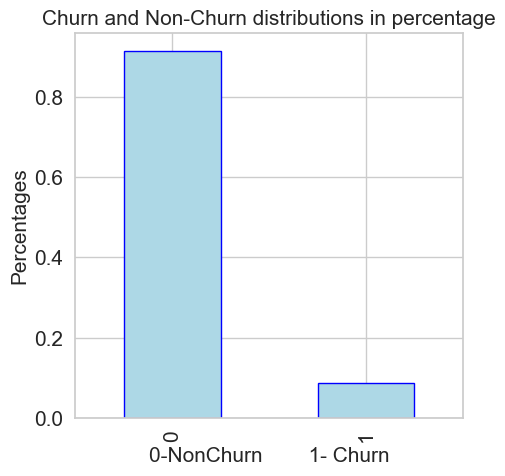

In [41]:
# plot to Check percetanges of churn and non churn data
plt.figure(figsize=(5,5))
DF['Churn'].value_counts(normalize=True).plot.bar(color = 'lightblue', edgecolor ='blue')
plt.tick_params(size=5,labelsize = 15) 
plt.title("Churn and Non-Churn distributions in percentage",fontsize=15)
plt.ylabel("Percentages",fontsize=15)
plt.xlabel("0-NonChurn        1- Churn",fontsize=15)
plt.show()

📌 This tells us that 8.6% customers have churned. Which indicates class imbalance, we will take care of it at later point by using SMOTE.

## Outlier Treatment

In [42]:
# Converting the Churn column to Object data type in order to proceed with Outlier Treatment.

DF['Churn'] = DF['Churn'].astype(object)

In [43]:
# Listing numeric columns only
num_cols = DF.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_6_7'],
      dtype='object', length=134)


In [44]:
DF.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7
count,"30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00"
mean,587.28,589.14,534.86,296.03,304.34,267.60,417.93,423.92,375.02,17.41,13.52,13.26,29.32,22.04,21.47,94.68,95.73,87.14,181.28,181.27,167.59,6.98,7.10,6.49,1.57,1.86,1.71,282.95,284.11,261.23,189.75,199.88,172.20,203.10,213.41,179.57,2.01,2.03,1.79,394.87,415.33,353.56,2.26,2.21,2.03,5.92,7.43,6.89,0.69,0.05,0.06,686.70,709.12,623.77,68.75,70.31,65.94,159.61,160.81,153.63,15.60,16.51,14.71,243.97,247.64,234.28,16.23,16.89,15.05

In [45]:
# Removing outliers below 10th and above 90th percentile
for col in num_cols:
    q1 = DF[col].quantile(0.10)
    q3 = DF[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into new_DF
    new_DF = DF.loc[(DF[col] > range_low) & (DF[col] < range_high)]

new_DF.shape

(29700, 135)

## **Adding Some New Columns with some insights**

Adding **dec_rech_action**

Indicating if the nUmber of rechabrge for a customer when compared to good phase is decreased in action phase or not

In [46]:
# Avg recharge number at action phase
# We are taking average because there are two months(7 and 8) in action phase
new_DF['avg_rech_num_action'] = (new_DF['total_rech_num_7'] + new_DF['total_rech_num_8'])/2
# Difference between total_rech_num_6 and avg_rech_action
new_DF['diff_rech_num'] = new_DF['avg_rech_num_action'] - new_DF['total_rech_num_6']

In [47]:
# Checking if recharge number has decreased in action phase, 1=Yes, 0=No
new_DF['dec_rech_action'] = np.where((new_DF['diff_rech_num'] < 0), 1, 0)

In [48]:
new_DF.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53

Adding **dec_avg_revenuePC_action**

Indicating if average revenue per customer when compared to good phase is decreased in action phase or not

In [49]:
# average ARUP in action phase
# We are taking average because there are two months(7 and 8) in action phase
new_DF['avg_arpu_action'] = (new_DF['arpu_7'] + new_DF['arpu_8'])/2
# Difference of good and action phase ARPU
new_DF['diff_arpu'] = new_DF['avg_arpu_action'] - new_DF['arpu_6']

In [50]:
# Checking whether the arpu has decreased on the action month, 1=Yes, 0=No
new_DF['dec_avg_revenuePC_action'] = np.where((new_DF['diff_arpu'] < 0), 1, 0)

In [51]:
new_DF.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.0

Adding **dec_rech_amt_action**

Indicating if recharge amount of customers when compared to good phase is decreased in action phase or not

In [52]:
# Avg recharge amount in action phase
# We are taking average because there are two months(7 and 8) in action phase
new_DF['avg_rech_amt_action'] = (new_DF['total_rech_amt_7'] + new_DF['total_rech_amt_8'])/2
# Difference of action phase recharge amount and good phase recharge amount
new_DF['diff_rech_amt'] = new_DF['avg_rech_amt_action'] - new_DF['total_rech_amt_6']

In [53]:
# Checking if recharge amount has decreased in action phase, 1=Yes, 0=No
new_DF['dec_rech_amt_action'] = np.where((new_DF['diff_rech_amt'] < 0), 1, 0)

In [54]:
new_DF.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0,"2,214.00",634.00,0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1,360.50,-76.50,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,3

Adding **dec_MOU_action**

Indicating if Minutes of Usages for the customers when compared to good phase is decreased in action phase or not

In [55]:
# Total mou at good phase incoming and outgoing
new_DF['total_mou_good'] = (new_DF['total_og_mou_6'] + new_DF['total_ic_mou_6'])
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
new_DF['avg_mou_action'] = (new_DF['total_og_mou_7'] + new_DF['total_og_mou_8'] + new_DF['total_ic_mou_7'] + new_DF['total_ic_mou_8'])/2

# Difference avg_mou_good and avg_mou_action
new_DF['diff_mou'] = new_DF['avg_mou_action'] - new_DF['total_mou_good']


In [56]:
# Checking whether the mou has decreased in action phase, 1=Yes, 0=No
new_DF['dec_MOU_action'] = np.where((new_DF['diff_mou'] < 0), 1, 0)

In [57]:
new_DF.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action,total_mou_good,avg_mou_action,diff_mou,dec_MOU_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0,"2,214.00",634.00,0,"1,113.99",973.09,-140.90,1
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1,360.50,-76.50,1,612.22,324.12,-288.10,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.2

             *********************************************************                       

## EDA

**Univariate Analysis**

Churn rate on the basis whether the customer decreased her/his MOU in action month

In [58]:
# Converting churn column to int in order to do aggfunc in the pivot table
new_DF['Churn'] = new_DF['Churn'].astype('int64')

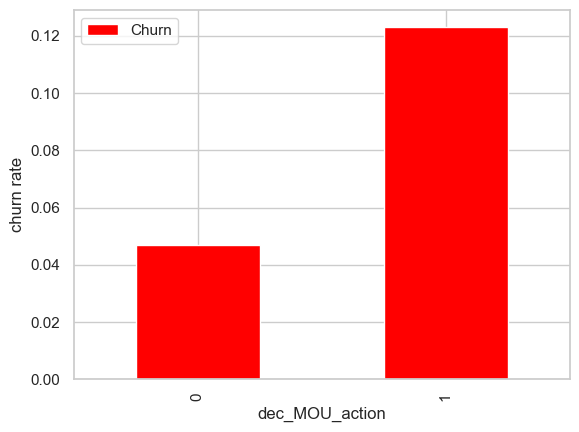

In [59]:
new_DF.pivot_table(values='Churn', index='dec_MOU_action', aggfunc='mean').plot.bar(color = 'red')
plt.ylabel('churn rate')
plt.show()

📌 We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

**-------------------------------------------------------------------------------------------------------------------------**

Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

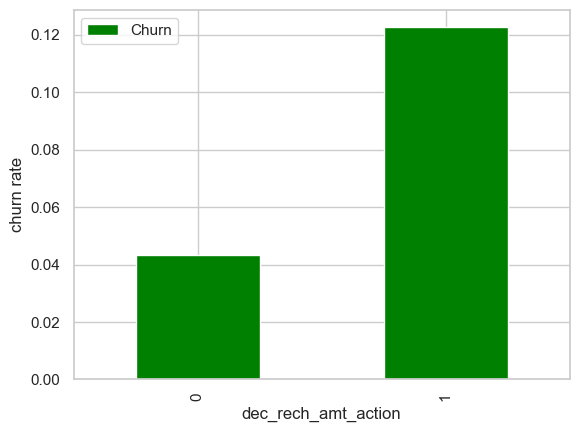

In [60]:
new_DF.pivot_table(values='Churn', index='dec_rech_amt_action', aggfunc='mean').plot.bar(color = 'green')
plt.ylabel('churn rate')
plt.show()

📌 Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

**-------------------------------------------------------------------------------------------------------------------------**

Churn rate on the basis whether the customer decreased her/his number of recharge in action month

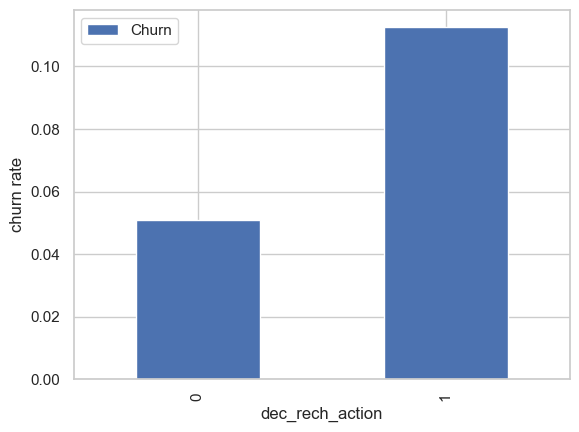

In [61]:
new_DF.pivot_table(values='Churn', index='dec_rech_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

📌 Here we see the expected result. The churn rate is more for the customers,number of recharge in the action phase is lesser than the number in good phase. From the above 3 plots it shows that the customers do not do the monthly recharge more when they are in the action phase.

**---------------------------------------------------------------------------------------------------------------------------**

Analysis of the minutes of usage MOU (churn and not churn) in the action phase

In [62]:
# Creating churn dataframe
Data_churn = new_DF[new_DF['Churn'] == 1]
# Creating not churn dataframe
Data_Non_churn = new_DF[new_DF['Churn'] == 0]

[Text(0.5, 0, 'Action phase MOU')]

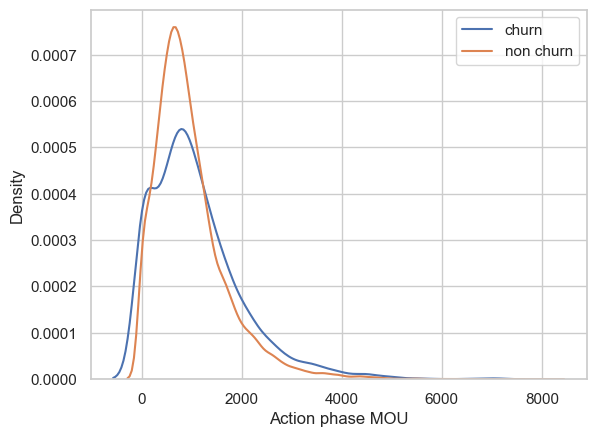

In [63]:
# Distribution plot
ax = sns.distplot(Data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(Data_Non_churn['total_mou_good'],label='non churn',hist=False)
plt.legend(loc='best')
ax.set(xlabel='Action phase MOU')

📌 Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

**BiVariate Analysis**

Analising recharge amount and number of recharge in action month

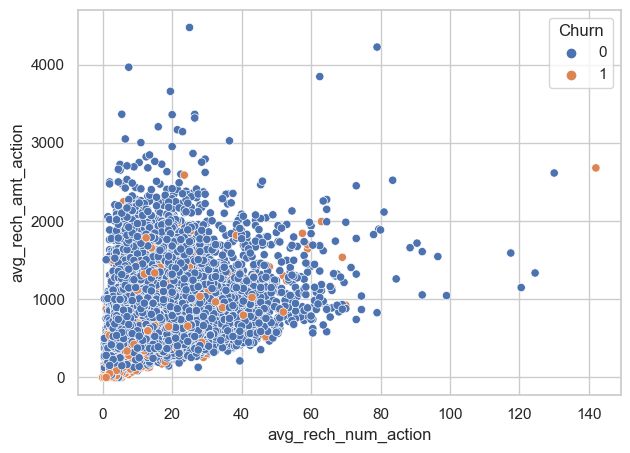

In [64]:
plt.figure(figsize=(7,5))
fig = sns.scatterplot(x='avg_rech_num_action',y='avg_rech_amt_action', hue='Churn', data= new_DF)

📌 We can see from the above pattern that the recharge number and the recharge amount are almost propotional. Higher the number of recharge, Higher is the amount of the recharge

**------------------------------------------------------------------------------------------------------------------------------------------**


Analizing churn rate WRT the decreasing recharge amount and number of recharge during the action phase

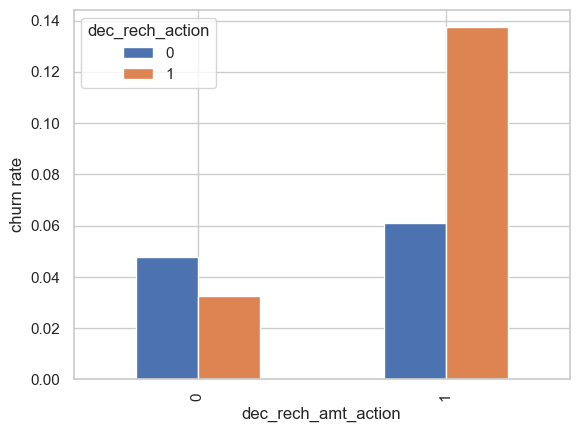

In [65]:
new_DF.pivot_table(values='Churn', index='dec_rech_amt_action', columns='dec_rech_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

📌 We can see from the above plot, that the churn rate is higher for the customers, whose recharge amount as well as number of recharge have decreased in the action phase when compared to the good phase.

In [66]:
# Function to create Box Plot for month 6,7 and 8
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = new_DF
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="Churn",hue="Churn",
                showfliers=False,palette=("flare"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [67]:
recharge_amnt_columns =  DF.columns[DF.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

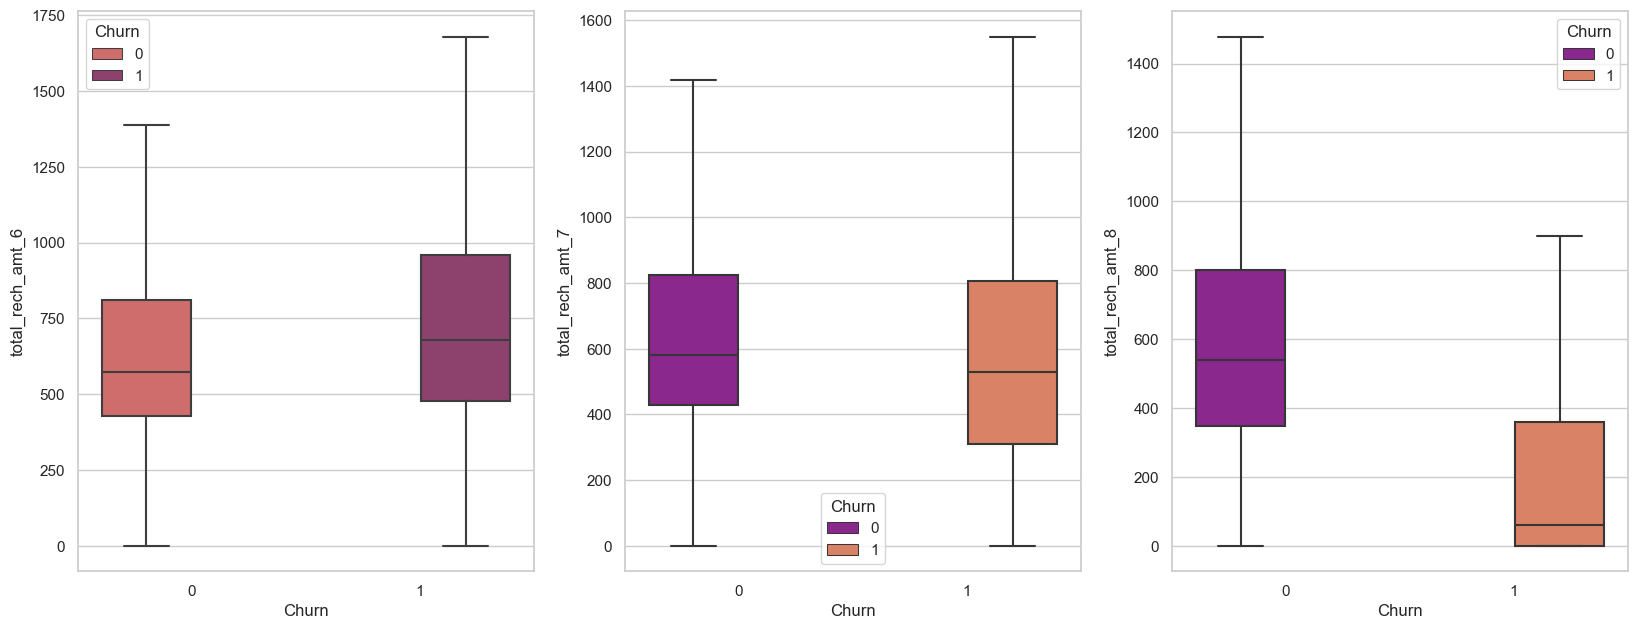

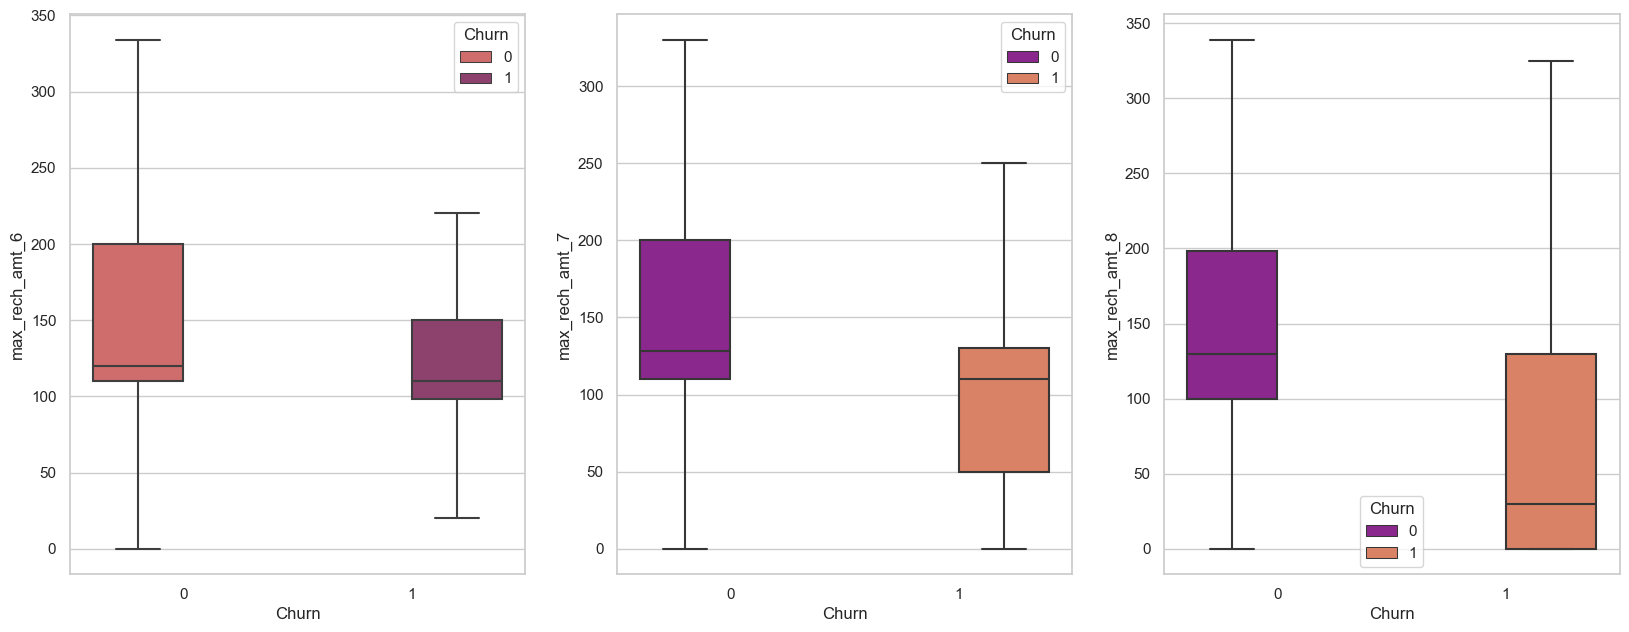

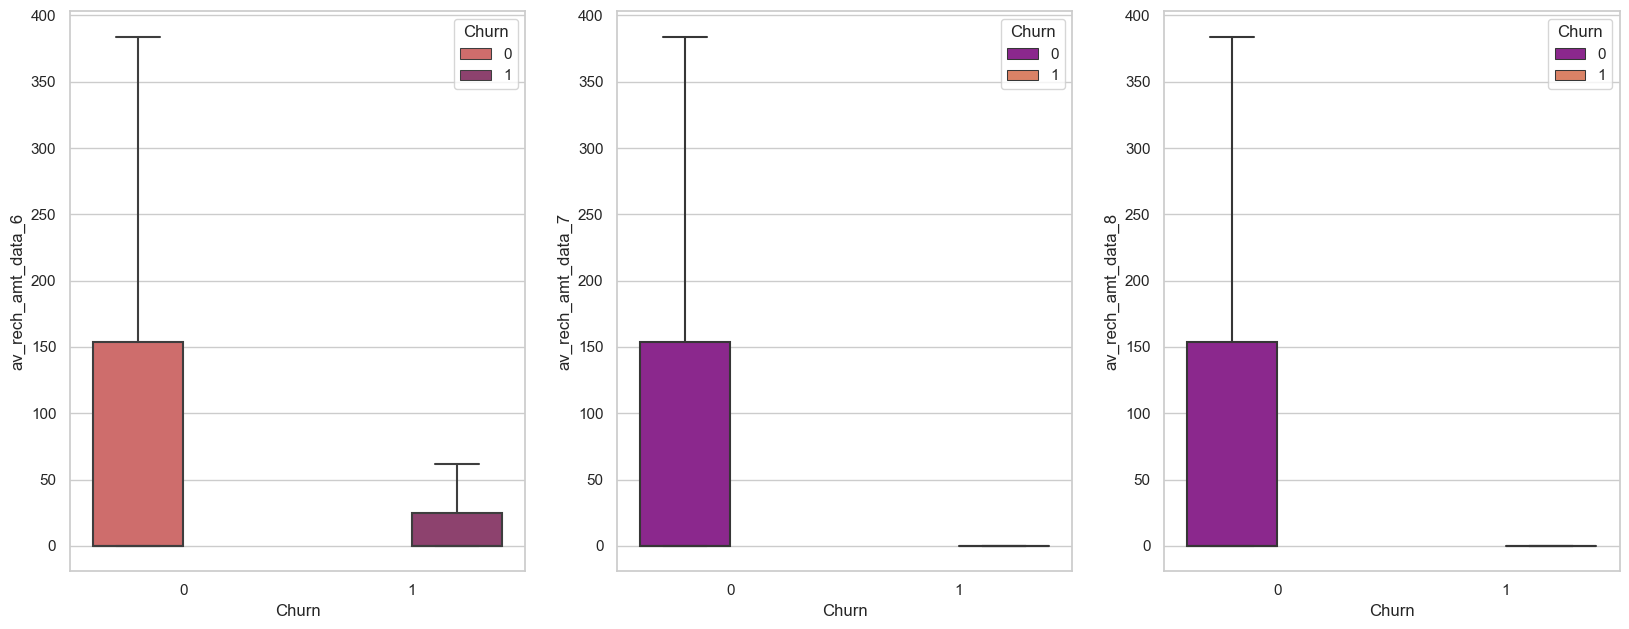

In [68]:
plot_box_chart('total_rech_amt')
plot_box_chart('max_rech_amt')
plot_box_chart('av_rech_amt_data')

***From the above plots we can see clearly that the reacharge amounts (Total & Maximum) started to fall in the month 8 i.e near to the churn phase.***

In [69]:
# Dropping the Some of the Derived columns that are not needed furthur.

new_DF = new_DF.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_rech_6_7'], axis=1)

In [70]:
#function for box plot
def bx_plot(*args,data):

    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 8*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:

        sns.boxplot(col, data, ax=ax_li[i])  # plotting the box plot
        ax_li[i].set_title(col)
        #ax_li[i].set_xscale('log')
        plt.tight_layout()
        i=i+1

In [71]:
# plotting the distribution for recharge amount columns
col_rech = [col for col in new_DF.columns if 'rech' in col]
col_rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'dec_rech_action',
 'dec_rech_amt_action']

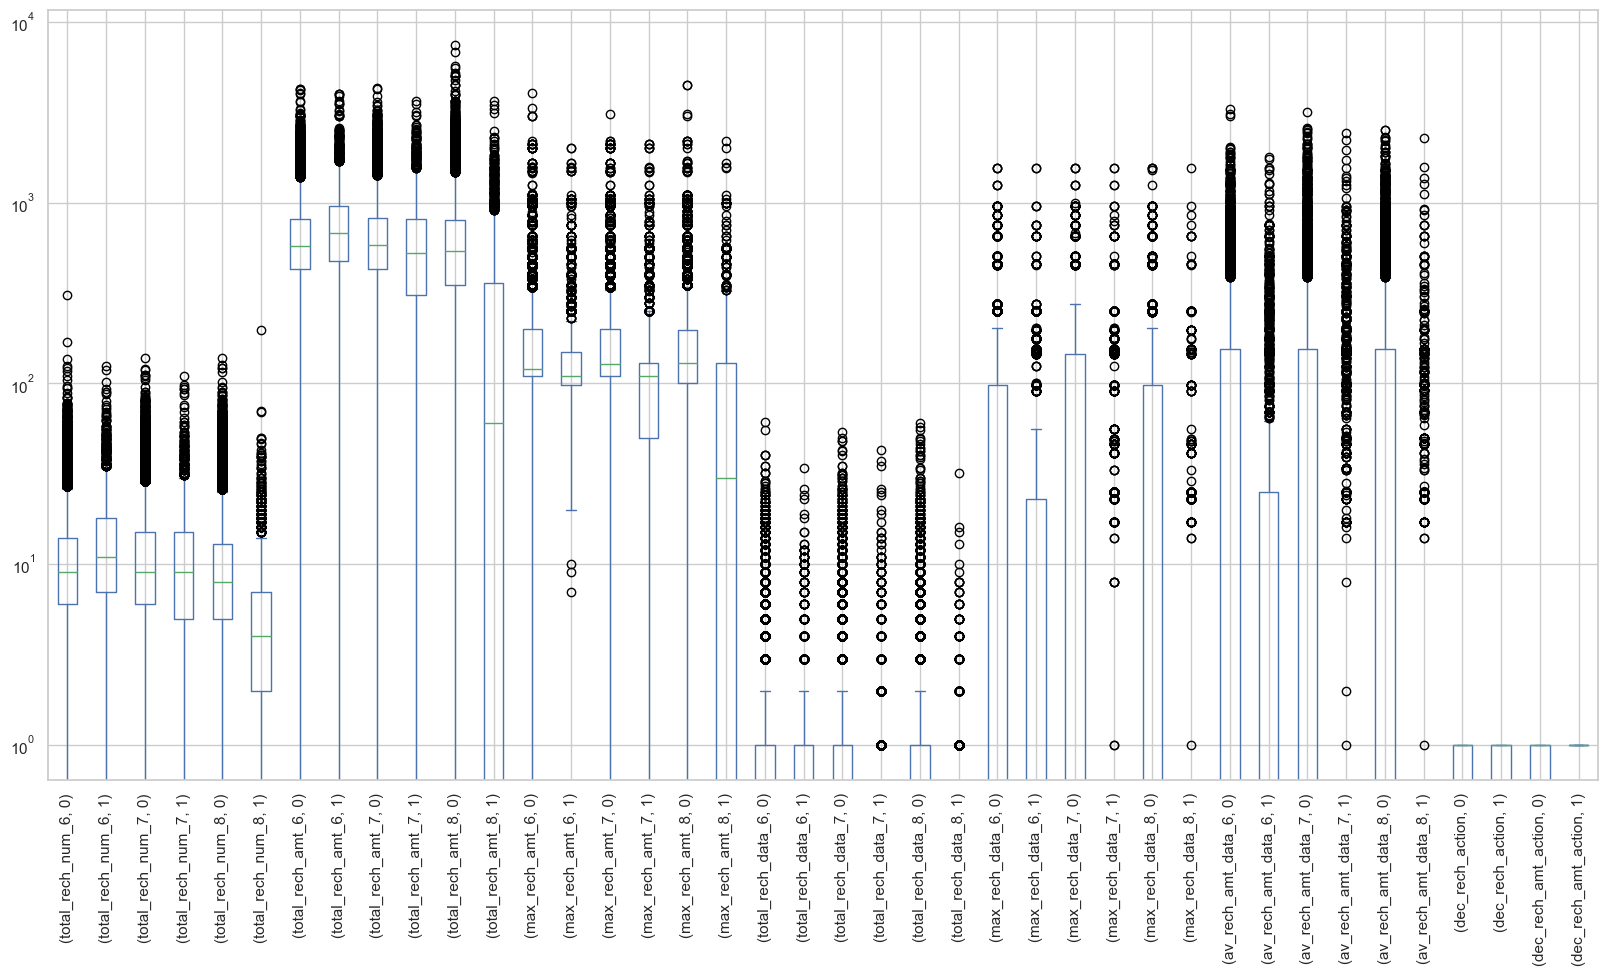

In [72]:
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

new_DF.pivot(columns='Churn')[col_rech].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')


**-----------------------------------------------------------------------------------------------------------------------------------------------**


# Train Test Split

In [73]:
from sklearn.model_selection import train_test_split

# Putting feature variables into X
X = new_DF.drop(['Churn'], axis=1)

# Putting target variable to y
y = new_DF.pop('Churn')

# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20790, 137), (8910, 137), (20790,), (8910,))

**Dealing with Class Imbalance using SMOTE** (Synthetic Minority Oversampling Technique)

We are creating synthetic samples by doing upsampling using SMOTE

In [75]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

# Instantiating SMOTE
smt = SMOTE(random_state=42)

# Fittign SMOTE to the train set
X_train, y_train = smt.fit_resample(X_train, y_train)

In [76]:
X_train.shape

(38004, 137)

### **Scaling numeric features**

During EDA we have observed few outliers in numeric features. So, using Robust Scaling using median and quantile values instead of Standard Scaling using mean and standard deviation.

In [77]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

In [78]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenuePC_action,dec_rech_amt_action,dec_MOU_action
0,"1,409.37","1,052.63","1,674.24",453.28,343.38,589.58,826.99,811.99,815.96,70.83,39.78,121.14,116.76,69.06,228.88,415.74,313.88,457.94,556.73,635.79,627.58,0.00,0.81,2.50,0.00,0.00,0.00,972.48,950.49,"1,088.03",4.68,3.38,1.28,184.41,132.43,86.66,0.00,0.00,0.68,189.09,135.81,88.63,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,0.00,"1,163.51","1,086.31","1,176.66",268.74,346.29,291.99,768.03,733.01,470.96,18.14,11.83,1.44,"1,054.93","1,091.14",764.41,5.59,2.03,0.00,36.28,61.58,55.23,3.15,0.00,5.65,45.03,63.61,60.88,"1,099.96","1,154.76",831.43,0.00,0.00,0.00,0.00,0.00,6.13,0.00,0.00,0.00,14.00,10.00,13.00,"1,760.00","1,048.00","1,970.00",250.00,250.00,250.00,0.00,200.00,130.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,791.00",0.00,0.00,0.00,1,1,1,1
1,388.90,533.34,675.71,13.28,11.94,48.51,201.43,230.93,277.83,0.00,0.00,0.00,0.00,0.00,0.00,7.16,8.86,30.91,188.41,219.04,245.49,10.01,0.36,11.81,0.15,0.00,0.00,205.59,228.28,288.23,6.11,3.08,17.59,2.85,6.49,16.98,0.00,0.00,3.53,8.96,9.58,38.11,0.00,0.00,0.00,0.15,5.01,0.00,0.00,0.00,0.00,214.71,242.88,326.34,7.04,5.38,11.56,183.64,600.43,251.44,24.83,71.06,29.36,215.53,676.88,292.38,3.24,4.06,7.86,0.85,4.45,8.91,0.00,0.00,2.31,4.09,8.51,19.09,219.76,685.39,311.48,0.00,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00,2.00,6.00,4.00,379.00,532.00,"1,034.00",379.00,250.00,400.00,0.00,27.00,350.00,0.00,1.00,1.00,0.00,145.00,154.00,0.00,145.00,154.00,0.00,1.84,3.87,0.00,478.99,127.33,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,"2,372.00",38.22,114.06,236.82,0,0,0,0
2,19.42,597.25,709.65,3.68,"1,031.28","1,018.29",24.89,927.86,"1,043.43",0.00,0.00,0.00,0.00,0.00,0.00,0.05,3.18,3.24,1.03,16.59,7.04,0.00,0.00,0.00,5.46,0.00,0.00,1.08,19.78,10.29,3.63,"1,028.09","1,015.04",18.39,907.38,"1,028.61",0.00,0.00,0.00,22.03,"1,935.48","2,043.66",0.00,0.00,0.00,5.46,6.21,8.86,0.00,0.00,0.00,28.58,"1,961.48","2,062.83",6.39,1.4

****Scaling the TRAIN data set****

In [79]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
print("Total scalable columns: ", len(cols_scale))
# Removing the derived binary columns
binary_cols_to_remove=['dec_MOU_action','dec_rech_action','dec_rech_amt_action','dec_avg_revenuePC_action']
for col in binary_cols_to_remove:
    cols_scale.remove(col)

print("Scalable cols after removing : ", len(cols_scale))


Total scalable columns:  137
Scalable cols after removing :  133


In [80]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [81]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenuePC_action,dec_rech_amt_action,dec_MOU_action
0,2.42,1.62,3.55,0.23,0.11,1.02,0.81,0.89,1.40,0.52,0.29,1.41,0.66,0.38,1.98,1.56,1.16,2.24,1.92,2.47,2.81,-0.31,-0.24,-0.09,-0.22,-0.20,-0.21,2.22,2.31,3.15,-0.53,-0.50,-0.37,-0.16,-0.22,-0.13,-0.15,-0.14,-0.04,-0.48,-0.50,-0.34,-0.12,-0.11,-0.07,-0.25,-0.36,-0.26,-0.36,-0.02,-0.01,0.62,0.65,1.27,1.65,2.02,2.09,2.99,3.07,2.14,0.19,0.01,-0.23,2.98,3.17,2.46,-0.17,-0.20,-0.20,0.04,0.34,0.42,0.06,-0.14,0.29,-0.05,0.14,0.27,2.53,2.76,2.16,-0.36,-0.14,-0.16,-0.18,-0.16,-0.03,-0.09,-0.09,-0.08,0.09,-0.17,0.60,2.66,1.07,3.53,0.60,0.56,0.93,-0.78,0.88,0.59,-0.41,-0.40,-0.36,-0.48,-0.46,-0.41,-0.45,-0.44,-0.38,-0.26,-0.24,-0.20,-0.29,-0.29,-0.25,-0.29,-0.28,-0.24,-0.29,-0.29,-0.28,-0.29,-0.29,-0.24,-0.16,-0.15,-0.12,0.80,-0.27,-0.29,-0.29,1,1,1,1
1,-0.60,0.02,0.82,-0.66,-0.62,-0.37,-0.48,-0.35,0.05,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.33,-0.30,-0.13,0.20,0.42,0.77,0.32,-0.27,0.54,-0.20,-0.20,-0.21,-0.07,0.06,0.43,-0.52,-0.50,-0.32,-0.56,-0.51,-0.34,-0.15,-0.14,0.28,-0.76,-0.71,-0.43,-0.12,-0.11,-0.07,-0.35,-0.11,-0.26,-0.36,-0.02,-0.01,-0.78,-0.64,-0.17,-0.38,-0.34,-0.25,0.23,2.40,0.89,0.37,1.53,0.62,0.05,1.72,0.58,-0.21,-0.17,-0.04,-0.33,-0.26,-0.14,-0.14,-0.14,0.05,-0.37,-0.30,-0.12,-0.14,1.33,0.42,-0.36,-0.14,-0.16,-0.17,-0.16,-0.13,-0.09,-0.09,-0.08,-1.13,-0.61,-0.47,-0.80,-0.22,1.39,1.45,0.56,1.99,-0.78,-0.49,2.53,-0.41,0.07,0.18,-0.48,1.01,1.42,-0.45,0.42,0.69,-0.26,-0.24,-0.18,-0.29,0.39,-0.05,-0.29,-0.28,3.36,-0.29,-0.29,-0.28,-0.29,1.78,-0.24,-0.16,-0.15,-0.12,1.45,-0.14,0.05,0.44,0,0,0,0
2,-1.69,0.21,0.91,-0.68,1.61,2.13,-0.85,1.14,1.97,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.36,-0.32,-0.28,-0.67,-0.58,-0.51,-0.31,-0.29,-0.27,0.49,-0.20,-0.21,-0.68,-0.59,-0.51,-0.53,1.96,2.62,-0.53,1.55,2.67,-0.15,-0.14,-0.12,-0.74,2.43,3.51,-0.12,-0.11,-0.07,-0.05,-0.05,0.21,-0.36,-0.02,-0.01,-1.05,1.99,2.76,-0.39,-0.36,-0.25,-0.58,-0.58,-0.41,-0.31,-0.30,-0.27,-0.64,-0.63,-0.44,-0.25,-0.23,-0.20,-0.18,0.35,-0.18,-0.14,-0.14,-0.11,-0.28,0.13,-0.24,-0.70,-0.53,-0.

****Scaling the TEST DATA set****

We do not fit scaler on the TEST data set. We can only transform TEST set.

In [82]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenuePC_action,dec_rech_amt_action,dec_MOU_action
2722,0.15,0.43,1.03,1.98,2.60,3.37,-0.37,-0.40,-0.22,-0.22,-0.24,-0.24,-0.28,-0.29,-0.29,0.10,-0.18,0.21,-0.05,-0.03,-0.18,-0.28,-0.29,-0.19,-0.22,-0.20,-0.21,0.02,-0.15,0.01,2.11,2.98,3.77,-0.30,-0.35,-0.09,-0.15,-0.14,-0.12,1.27,1.76,2.46,-0.12,-0.11,-0.07,-0.29,-0.12,-0.06,0.15,-0.02,-0.01,1.22,1.57,2.11,0.23,0.12,0.67,-0.43,0.03,-0.34,-0.28,-0.30,-0.23,-0.25,0.04,0.05,0.09,0.58,0.08,0.10,-0.09,-0.04,-0.14,-0.14,-0.11,0.10,0.20,-0.01,-0.19,0.10,0.01,-0.36,-0.14,-0.16,-0.06,-0.07,-0.12,-0.09,-0.09,-0.08,-0.52,-0.39,0.13,0.35,0.57,1.18,-0.25,-0.17,0.22,0.18,0.31,0.76,-0.41,-0.40,-0.36,-0.48,-0.46,-0.41,-0.45,-0.44,-0.38,-0.26,-0.24,-0.20,-0.29,-0.29,-0.25,-0.29,-0.28,-0.24,-0.29,-0.29,-0.28,-0.29,-0.29,-0.24,-0.16,-0.15,-0.12,-0.70,-0.27,-0.29,-0.29,0,0,0,0
28720,-0.90,-0.54,0.87,-0.63,-0.49,-0.23,-0.54,-0.39,-0.13,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.24,-0.01,0.28,0.12,0.35,0.51,-0.10,-0.29,-0.25,-0.22,-0.20,-0.21,-0.08,0.20,0.48,-0.54,-0.51,-0.38,-0.56,-0.52,-0.36,-0.15,0.03,-0.08,-0.77,-0.71,-0.49,-0.12,-0.11,-0.07,-0.36,-0.36,-0.26,-0.36,-0.02,-0.01,-0.79,-0.58,-0.19,-0.25,0.04,0.84,0.70,0.84,1.27,-0.31,-0.30,-0.27,0.36,0.57,1.25,-0.26,-0.23,-0.20,-0.29,-0.27,-0.20,-0.14,-0.14,-0.03,-0.37,-0.34,-0.25,0.14,0.32,0.93,-0.36,-0.14,-0.16,-0.18,-0.16,-0.13,-0.09,-0.09,-0.08,0.09,0.69,0.84,-0.94,-0.50,0.86,-0.84,-0.76,1.46,-0.54,-0.47,-0.30,3.09,3.82,2.85,-0.22,-0.20,1.31,0.63,0.81,0.45,2.34,-0.01,-0.18,-0.29,1.90,1.89,-0.29,-0.28,-0.24,4.25,0.90,0.42,-0.29,-0.29,2.06,-0.16,8.07,5.19,1.88,1.39,-0.09,-0.29,0,0,0,0
43175,0.44,0.09,0.55,1.77,2.28,2.71,-0.67,-0.57,-0.35,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.19,-0.28,-0.24,-0.52,-0.60,-0.38,-0.24,-0.18,-0.27,-0.22,-0.20,-0.21,-0.47,-0.57,-0.40,2.03,2.67,3.26,-0.40,-0.33,-0.15,-0.15,-0.14,-0.12,1.14,1.57,2.07,-0.12,-0.11,-0.07,-0.06,1.51,0.27,3.35,-0.02,-0.01,0.87,1.24,1.59,0.17,-0.02,0.58,-0.33,-0.38,-0.10,1.08,0.82,0.80,-0.03,-0.16,0.31,-0.12,0.29,0.31,-0.33,-0.30,-0.24,-0.07,-0.12,-0.11,-0.32,-0.10,-0.

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Model building with PCA
(Principal Component Analysis)

In [83]:
#Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(svd_solver='randomized', random_state=100)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=100, svd_solver='randomized')

In [84]:
# Looking at the Principal components
pca.components_

array([[ 3.43816642e-02,  1.11902296e-01,  1.55459988e-01, ...,
        -3.32521563e-02, -3.36223735e-02, -2.93010553e-02],
       [ 6.22345033e-02,  1.17774181e-01,  1.04064177e-01, ...,
        -1.30651108e-02, -1.25691901e-02, -5.84779464e-03],
       [ 5.60397985e-02,  1.61155033e-01,  1.43011394e-01, ...,
        -3.27725102e-02, -3.47598333e-02, -3.35399624e-02],
       ...,
       [ 4.42439780e-16, -2.59590798e-17,  1.22487336e-16, ...,
        -1.62900725e-17, -1.23749307e-16, -1.54204055e-16],
       [ 0.00000000e+00, -2.88192135e-18,  1.66819617e-16, ...,
        -1.03689519e-16, -2.32330263e-17,  2.77563404e-17],
       [-0.00000000e+00,  1.08984084e-17, -1.26795332e-16, ...,
         1.35688529e-16,  2.50456797e-16,  5.50414718e-17]])

In [85]:
# Cumuliative varinace of the principal components.
variance_cumu = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
print(variance_cumu)

[ 10.4176  18.6791  25.0507  29.2913  33.3786  37.1281  40.4399  43.2009
  45.626   48.0124  50.1358  52.2197  54.2908  56.2503  58.028   59.7345
  61.4051  62.8665  64.2597  65.6203  66.8989  68.1094  69.2909  70.3862
  71.453   72.4519  73.4217  74.3208  75.2094  76.0738  76.8851  77.6793
  78.447   79.1978  79.935   80.6653  81.3731  82.0587  82.7168  83.3691
  83.9925  84.5839  85.1353  85.6517  86.1623  86.6547  87.1323  87.5715
  88.0049  88.4211  88.8251  89.2253  89.6063  89.9808  90.352   90.7147
  91.066   91.4063  91.7417  92.0709  92.3949  92.6955  92.9827  93.2658
  93.5309  93.7906  94.0425  94.2865  94.5296  94.7652  94.9989  95.2299
  95.4527  95.6675  95.8783  96.0862  96.2902  96.4903  96.6862  96.8793
  97.0669  97.2522  97.4243  97.5957  97.7619  97.9265  98.0882  98.232
  98.3679  98.5016  98.6316  98.7599  98.8817  98.9974  99.1037  99.1983
  99.2912  99.3775  99.4606  99.5376  99.6103  99.6763  99.7401  99.8013
  99.8481  99.885   99.9181  99.9476  99.9727  99.99

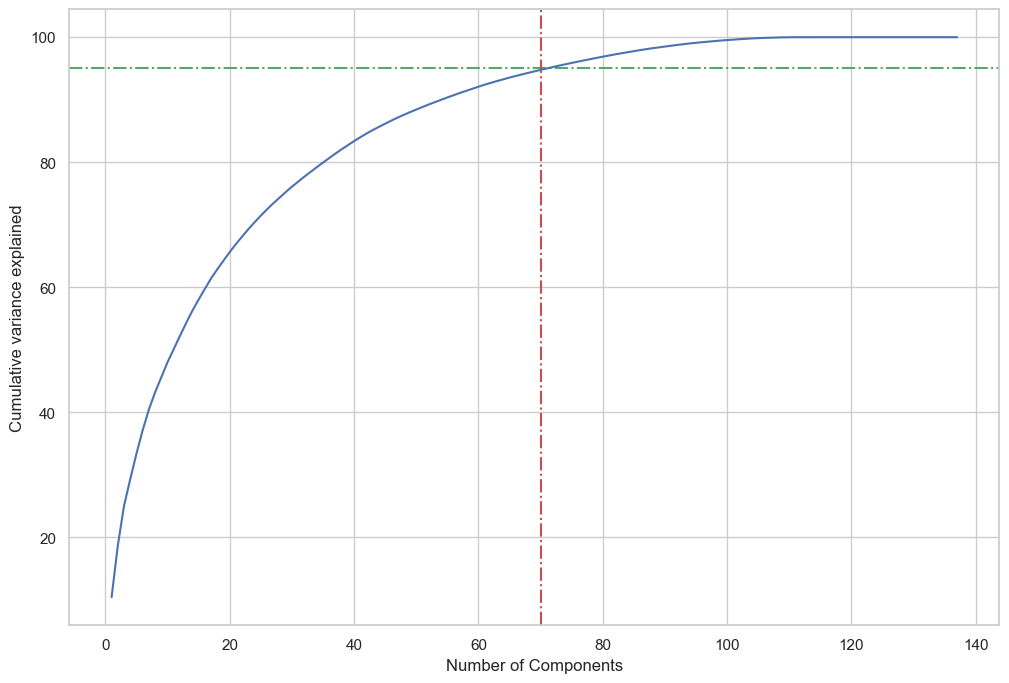

In [86]:
# # Plotting scree plot
fig = plt.figure(figsize=[12,8])
plt.axhline(y=95, color='g', linestyle='-.')
plt.axvline(x=70, color='r', linestyle='-.')
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel("Cumulative variance explained")
plt.show()

<a>As per above looks like 70 components are enough to describe 95% of the variance in the dataset. We'll choose 70 components for our modeling

**Using incremental PCA for better efficiency**

In [87]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 70)

X_train_pca = pca_final.fit_transform(X_train)

In [88]:
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (38004, 137)
Size of dataset after PCA is: (38004, 70)


In [89]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.016 , min negative corr:  -0.017


<a>We can see from the above calculations that the correlation among the attributes is almost 0, we can proceed with these principal components.

*Applying transformation on the test set*


We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [90]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8910, 70)

     *********************************************************************               

# MODEL BUILDING

Now we build models based on this PCA transformed dataset to predict customer churn

## 1. Logistic regression with PCA

In [91]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [92]:
# default solver is very slow so changed to 'lbfgs'
logreg = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [93]:
# Training the model on the data
logreg.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [94]:
#prediction on test data
y_pred = logreg.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

confusoin matrix 	
 [[6696 1447]
 [ 139  628]]
sensitivity 	 0.82
specificity 	 0.82
area under the curve 	 0.82


***Tuning hyperparameter C***


C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [95]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [96]:

# Creating StratifiedKFold object with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# GridSearch
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [97]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.28,0.02,0.01,0.00,0.01,{'C': 0.01},0.91,0.91,0.91,0.90,0.91,0.91,0.00,6,0.91,0.91,0.91,0.91,0.91,0.91,0.00
1,0.32,0.02,0.01,0.00,0.10,{'C': 0.1},0.91,0.91,0.91,0.90,0.91,0.91,0.00,5,0.91,0.91,0.91,0.91,0.91,0.91,0.00
2,0.30,0.01,0.01,0.00,1,{'C': 1},0.91,0.91,0.91,0.90,0.91,0.91,0.00,4,0.91,0.91,0.91,0.91,0.91,0.91,0.00
3,0.32,0.02,0.01,0.00,10,{'C': 10},0.91,0.91,0.91,0.90,0.91,0.91,0.00,3,0.91,0.91,0.91,0.91,0.91,0.91,0.00
4,0.31,0.03,0.01,0.00,100,{'C': 100},0.91,0.91,0.91,0.90,0.91,0.91,0.00,2,0.91,0.91,0.91,0.91,0.91,0.91,0.00
5,0.30,0.01,0.01,0.00,1000,{'C': 1000},0.91,0.91,0.91,0.90,0.91,0.91,0.00,1,0.91,0.91,0.91,0.91,0.91,0.91,0.00


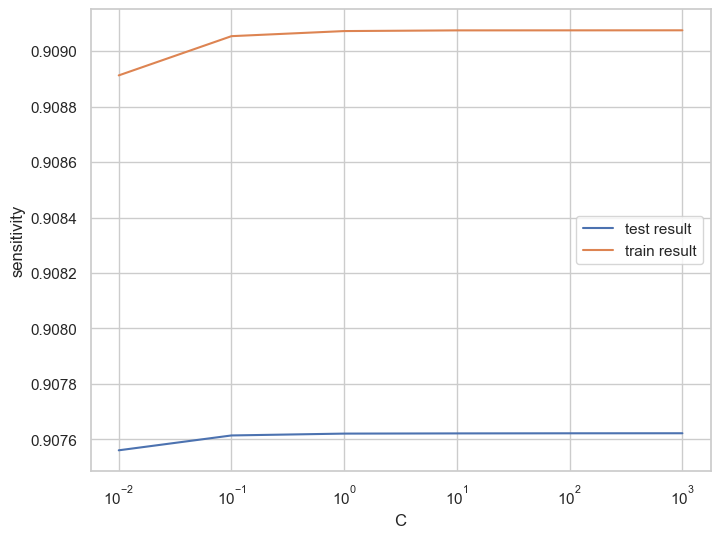

In [98]:
 # plotting C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

In [99]:

# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9076219498149272 at C = 1000


**MODEL WITH OPTIMUM Paramaters**

In [100]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

Prediction on the train set

In [101]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

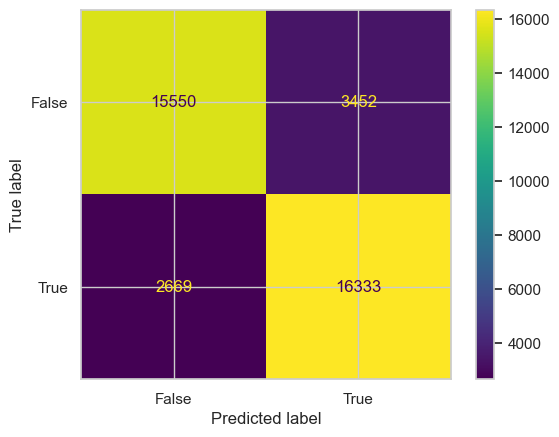

In [102]:
## Confusion Matrix.

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [103]:
TP = confusion_matrix[1,1] # true positive
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [104]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_train_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))



Accuracy:- 0.8389380065256289
Sensitivity:- 0.8595411009367435
Specificity:- 0.8183349121145143
Recall:- 0.8595411009367435
AUC:    	 0.91


**Prediction on the test set**

In [105]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

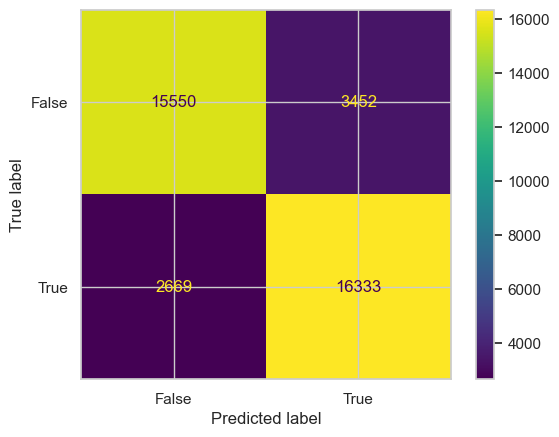

In [106]:
# Confusion matrix
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [107]:
# Accuracy
print("Accuracy:-    \t",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-  \t",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-  \t", round(TN / float(TN+FP),2))

# Recall
print("Recall:-    \t" , round(TP/float(TP+FN),2))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_test_pca)[:, 1]
print("AUC:-    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy:-    	 0.82
Sensitivity:-  	 0.86
Specificity:-  	 0.82
Recall:-    	 0.86
AUC:-    	 0.89


📌 OverAll we can see that the model is performing well in the TEST set, as per what it has learned from the TRAIN set.

*******************************************************************************************************************************************************************************************************************************

## 2. Decision tree with PCA

In [108]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

**Hyperparameter tuning**

In [109]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model for best results.
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'recall',
                           cv = 5,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [110]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.87,0.17,0.01,0.00,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.79,0.80,0.83,0.84,0.80,0.81,0.02,7
1,1.89,0.14,0.01,0.00,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.79,0.80,0.83,0.84,0.80,0.81,0.02,7
2,1.73,0.02,0.01,0.00,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.79,0.80,0.83,0.84,0.80,0.81,0.02,5
3,1.89,0.14,0.01,0.00,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.79,0.80,0.83,0.84,0.80,0.81,0.02,5
4,3.00,0.18,0.01,0.00,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.83,0.84,0.85,0.85,0.83,0.84,0.01,2
5,3.06,0.19,0.01,0.00,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.83,0.84,0.85,0.85,0.83,0.84,0.01,1
6,2.78,0.19,0.01,0.00,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.82,0.85,0.84,0.83,0.83,0.83,0.01,3
7,2.81,0.14,0.01,0.00,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.82,0.85,0.84,0.83,0.83,0.83,0.01,3


In [111]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8403317271078248
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


**Model with optimal hyperparameters**

In [112]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=10)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=10,
                       random_state=100)

**Prediction on the train set**

In [113]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)


# Creating Confusion matrix

confusion=metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[16521,  2481],
       [ 2382, 16620]], dtype=int64)

In [114]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_train, y_train_pred),2))

Accuracy:- 0.87
Sensitivity:- 0.87
Specificity:- 0.87
Recall:- 0.87
Area under curve is: 0.87


**Prediction on the test set**

In [116]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [117]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6903 1240]
 [ 229  538]]


In [118]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_test_pred),2))

Accuracy:- 0.84
Sensitivity:- 0.87
Specificity:- 0.87
Recall:- 0.87
Area under curve is: 0.77


In [119]:
# from sklearn.metrics import classification_report,confusion_matrix
# y_pred = dt_pca_model.predict(X_test_pca)
# print(classification_report(y_test, y_pred))

**Model summary** (Decesion Trees with PCA)

-  `Train set`
  * Accuracy = 0.87
  * Sensitivity = 0.89
  * Specificity = 0.86
  * roc_auc_score= 0.87
-  `Test set`
  * Accuracy = 0.83
  * Sensitivity = 0.89
  * Specificity = 0.86
  * roc_auc_score= 0.77

We can see from the model performance that the Sesitivity and Specificity remains same while evaluating the model on the test set and Train Set. However, the accuracy dropped a little in  TEST set but still it is quite good in the test set.


*******************************************************************************************************************************************************************************************************************************

## 3. Random forest with PCA

In [120]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [121]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [122]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [123]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [124]:
# Checking the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8143
           1       0.47      0.52      0.49       767

    accuracy                           0.91      8910
   macro avg       0.71      0.73      0.72      8910
weighted avg       0.91      0.91      0.91      8910



In [125]:
# Printing confusion matrix
confusion=metrics.confusion_matrix(y_test,predictions)
confusion

array([[7686,  457],
       [ 367,  400]], dtype=int64)

In [126]:
print(accuracy_score(y_test,predictions))

0.9075196408529742


The model looks good, let's now look at the list of hyperparameters which we can tune to improve model performance.

### Hyperparameter Tuning for Random Forest

***Tuning max_depth***

Looking at the optimum values for ```max_depth``` and See how the value of max_depth impacts the overall accuracy of the ensemble.


In [127]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.9419007679045002
{'max_depth': 17}


In [128]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.23,1.75,0.15,0.03,2,{'max_depth': 2},0.78,0.80,0.79,0.79,0.79,0.79,0.01,4,0.80,0.79,0.79,0.79,0.79,0.79,0.00
1,54.82,4.19,0.18,0.01,7,{'max_depth': 7},0.85,0.86,0.86,0.86,0.86,0.86,0.01,3,0.87,0.87,0.87,0.87,0.87,0.87,0.00
2,83.49,6.77,0.26,0.02,12,{'max_depth': 12},0.92,0.92,0.92,0.92,0.91,0.92,0.00,2,0.96,0.96,0.96,0.96,0.96,0.96,0.00
3,86.64,8.02,0.22,0.04,17,{'max_depth': 17},0.94,0.94,0.94,0.94,0.94,0.94,0.00,1,0.99,0.99,0.99,0.99,0.99,0.99,0.00


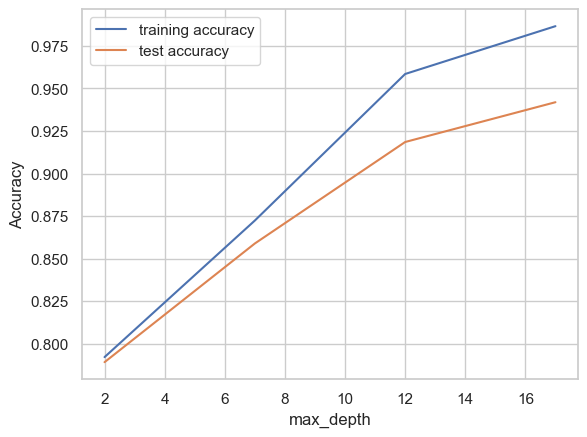

In [129]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

📌 We see that as we increase the value of max_depth, both train and test scores increase till a point. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

***Tuning n_estimators***

Now let's look at optimum values for n_estimators and see how the value of n_estimators impacts the overall accuracy. we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [130]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 500)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight ='balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds, verbose = 1,
                   scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.8210978091525354
{'n_estimators': 1100}


In [131]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,31.90,2.43,0.17,0.02,100,{'n_estimators': 100},0.81,0.83,0.82,0.82,0.82,0.82,0.01,3,0.82,0.82,0.82,0.82,0.82,0.82,0.00
1,198.73,5.33,0.89,0.09,600,{'n_estimators': 600},0.81,0.83,0.82,0.82,0.82,0.82,0.01,2,0.83,0.82,0.82,0.82,0.82,0.82,0.00
2,314.65,29.60,1.24,0.24,1100,{'n_estimators': 1100},0.81,0.83,0.82,0.82,0.82,0.82,0.01,1,0.83,0.82,0.82,0.82,0.82,0.82,0.00


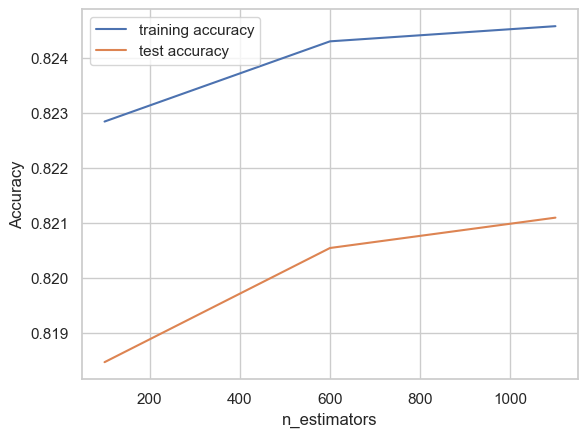

In [132]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


***Tuning max_features***

We'll see the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [133]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds,
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8242553334395059
{'max_features': 14}


In [134]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,19.18,2.01,0.17,0.01,4,{'max_features': 4},0.80,0.82,0.81,0.81,0.81,0.81,0.01,5,0.82,0.81,0.81,0.81,0.82,0.81,0.00
1,38.26,3.60,0.22,0.04,8,{'max_features': 8},0.81,0.83,0.82,0.82,0.82,0.82,0.01,3,0.82,0.82,0.82,0.82,0.82,0.82,0.00
2,62.32,6.54,0.19,0.03,14,{'max_features': 14},0.82,0.83,0.82,0.83,0.82,0.82,0.00,1,0.83,0.83,0.83,0.83,0.83,0.83,0.00
3,88.18,8.44,0.18,0.02,20,{'max_features': 20},0.81,0.82,0.81,0.82,0.82,0.82,0.01,4,0.82,0.82,0.82,0.82,0.82,0.82,0.00
4,96.98,7.51,0.15,0.02,24,{'max_features': 24},0.81,0.83,0.82,0.82,0.82,0.82,0.00,2,0.82,0.82,0.82,0.82,0.82,0.82,0.00


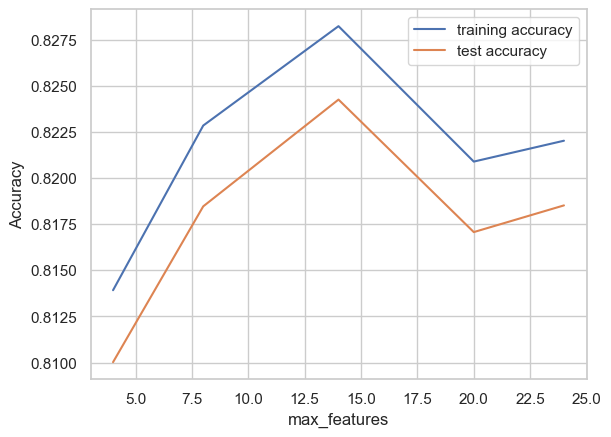

In [135]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_features"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


***Tuning min_samples_leaf***

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [136]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8536996032378011
{'min_samples_leaf': 100}


In [137]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,73.25,6.29,0.27,0.03,100,{'min_samples_leaf': 100},0.84,0.86,0.86,0.86,0.85,0.85,0.01,1,0.87,0.86,0.87,0.86,0.87,0.86,0.00
1,64.77,4.91,0.24,0.03,150,{'min_samples_leaf': 150},0.83,0.85,0.85,0.85,0.84,0.84,0.01,2,0.85,0.85,0.85,0.85,0.85,0.85,0.00
2,62.01,5.93,0.26,0.04,200,{'min_samples_leaf': 200},0.83,0.84,0.84,0.84,0.84,0.84,0.01,3,0.85,0.84,0.85,0.84,0.85,0.85,0.00
3,61.74,6.77,0.29,0.09,250,{'min_samples_leaf': 250},0.82,0.84,0.84,0.84,0.83,0.83,0.01,4,0.84,0.84,0.84,0.84,0.84,0.84,0.00
4,60.39,7.27,0.24,0.03,300,{'min_samples_leaf': 300},0.82,0.84,0.83,0.84,0.83,0.83,0.01,5,0.84,0.83,0.84,0.84,0.84,0.84,0.00


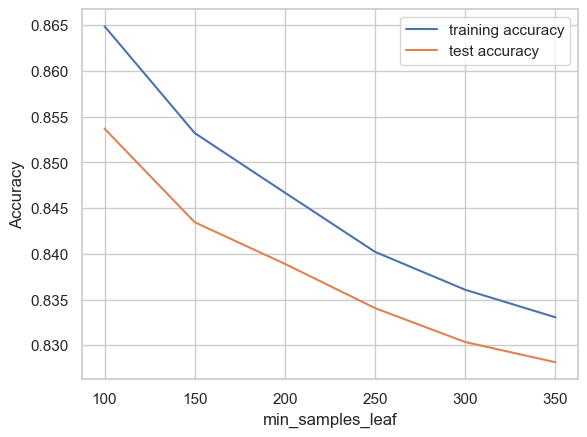

In [138]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that the model starts to overfitying as you decrease the value of min_samples_leaf.

***Tuning min_samples_split***

Checking the performance of the ensemble as we vary min_samples_split.

In [139]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds,
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8694348389062381
{'min_samples_split': 200}


In [140]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,94.91,6.54,0.30,0.05,200,{'min_samples_split': 200},0.86,0.88,0.87,0.87,0.87,0.87,0.01,1,0.89,0.89,0.89,0.89,0.89,0.89,0.00
1,87.47,7.94,0.26,0.03,250,{'min_samples_split': 250},0.85,0.87,0.86,0.86,0.86,0.86,0.01,2,0.88,0.88,0.88,0.88,0.88,0.88,0.00
2,89.30,8.15,0.26,0.05,300,{'min_samples_split': 300},0.84,0.86,0.86,0.86,0.86,0.86,0.01,3,0.87,0.87,0.87,0.87,0.88,0.87,0.00
3,90.55,5.53,0.27,0.02,350,{'min_samples_split': 350},0.84,0.86,0.85,0.86,0.85,0.85,0.01,4,0.87,0.87,0.87,0.87,0.87,0.87,0.00
4,88.27,6.08,0.28,0.05,400,{'min_samples_split': 400},0.84,0.86,0.85,0.85,0.85,0.85,0.01,5,0.86,0.86,0.86,0.86,0.86,0.86,0.00


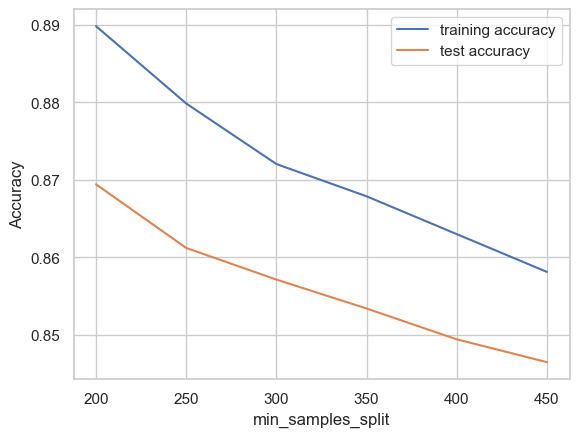

In [141]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Finally we find the optimal hyperparameters using GridSearchCV.

In [142]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300],
    'max_features': [5, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1,verbose = 1)

In [143]:
# Fitting the grid search to the data

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [144]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8490948321229345 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [145]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],
                             n_estimators =grid_search.best_params_['n_estimators'],
                             random_state=100, oob_score=True)

In [146]:
# fitting the Model
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_split=200, oob_score=True, random_state=100)

In [147]:
# predicting using test data

predictions = rfc.predict(X_test_pca)

In [148]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8143
           1       0.38      0.71      0.49       767

    accuracy                           0.87      8910
   macro avg       0.67      0.80      0.71      8910
weighted avg       0.92      0.87      0.89      8910



In [149]:
rfc.oob_score_

0.8646195137353963

OOB Score tells how accuarte will be our model, we calculated the OOB score based on the train data set. Now, next we will also see the predictions and other metrics.

In [150]:
#create confusion matrix
cm = metrics.confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test, predictions),2))

#checking sesitivity
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[7240  903]
 [ 223  544]]
Accuracy:- 0.87
sensitivity 	 0.71
specificity 	 0.89
AUC:    	 0.88


**Model summary** (Random Forest with PCA)

  * Accuracy =    0.87
  * Sensitivity = 0.70
  * Specificity = 0.89
  * AUC Score =   0.88

****************************************************************************************************************************************************************************

# Modelling without PCA

#### Logistic Regression without PCA

In [151]:

import statsmodels.api as sm

# Instantiate the model and also Adding the constant to X_train

log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

# Fitting the model
log_no_pca = log_no_pca.fit().summary()

# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37869
Model Family:                Binomial   Df Model:                          134
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 09 Dec 2023   Deviance:                       27114.
Time:                        17:25:51   Pearson chi2:                 2.73e+05
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.6389      0.052     12.277      0.000       0.537       0.741
arpu_6                       0.2757      0.059      4.664      0.000       0.160       0.392
arpu_7                       0.1041      0.062      1.680      0.093      -0.017       0.226
arpu_8                       0.6622      0.078      8.484      0.000       0.509       0.815
onnet_mou_6                  9.1109      2.409      3.783      0.000       4.390      13.832
onnet_mou_7                 -5.3742      1.492     -3.603      0.000      -8.298      -2.450
onnet_mou_8                  2.2175      1.149      1.930      0.054      -0.034       4.469
offnet_mou_6                 9.6843      2.367      4.091      0.000       5.044      14.324
offnet_mou_7                -5.6841      1.505     -3.776      0.000      -8.634      -2.734
offnet_mou_8                 1.0968      1.158      0.947      0.344      -1.173       3.366
roam_ic_mou_6                0.1195      0.032      3.744      0.000       0.057       0.182
roam_ic_mou_7               -0.0162      0.029     -0.559      0.576      -0.073       0.041
roam_ic_mou_8                0.0156      0.027      0.575      0.566      -0.038       0.069
roam_og_mou_6               -2.5257      0.613     -4.121      0.000      -3.727      -1.325
roam_og_mou_7                1.4099      0.328      4.297      0.000       0.767       2.053
roam_og_mou_8               -0.3801      0.296     -1.286      0.198      -0.959       0.199
loc_og_t2t_mou_6          2175.3980    671.593      3.239      0.001     859.100    3491.696
loc_og_t2t_mou_7           210.0031    645.924      0.325      0.745   -1055.985    1475.992
loc_og_t2t_mou_8          7008.2804    589.922     11.880      0.000    5852.055    8164.506
loc_og_t2m_mou_6          2167.0854    669.189      3.238      0.001     855.500    3478.671
loc_og_t2m_mou_7           204.1833    628.220      0.325      0.745   -1027.105    1435.471
loc_og_t2m_mou_8          7253.0171    610.470     11.881      0.000    6056.519    8449.516
loc_og_t2f_mou_6           160.3517     49.506      3.239      0.001      63.322     257.381
loc_og_t2f_mou_7            15.8066     49.221      0.321      0.748     -80.664     112.277
loc_og_t2f_mou_8           567.9886     47.796     11.884      0.000     474.310     661.668
loc_og_t2c_mou_6            -0.0338      0.022     -1.535      0.125      -0.077       0.009
loc_og_t2c_mou_7             0.1622      0.027      6.038      0.000       0.110       0.215
loc_og_t2c_mou_8            -0.0468      0.019     -2.456      0.014      -0.084      -0.009
loc_og_mou_6             -6151.8150   1281.174     -4.802      0.000   -8662.869   -3640.761
loc_og_mou_7             -3183.9463   1271.748     -2.504      0.012   -5676.526    -691.366
loc_og_mou_8  

1. As we see there are Many features with high p-values and hence those are insignificant for our model.
2. Also, there are few features with negative coefficients as well.

**Tuning the parameters**

First we will Select some of the features using RFE and then we will manually eleminate the remaining features based on p-values and VIF, untill we get a best model.

***Feature selection using RFE***

In [152]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

**Using RFE with 15 columns/features**

In [153]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train,y_train)

In [154]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_6', 'onnet_mou_8', 'std_og_t2m_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8',
       'dec_rech_action', 'dec_avg_revenuePC_action'],
      dtype='object')


### Model-1

In [155]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37988
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 09 Dec 2023   Deviance:                       30556.
Time:                        17:27:38   Pearson chi2:                 1.94e+08
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.4739      0.049      9.576      0.000       0.377       0.571
arpu_6                       0.5393      0.023     23.797      0.000       0.495       0.584
onnet_mou_8                  1.3359      0.065     20.554      0.000       1.209       1.463
std_og_t2m_mou_8             1.1846      0.059     20.141      0.000       1.069       1.300
og_others_8                 -6.8052      3.118     -2.183      0.029     -12.916      -0.694
total_og_mou_8              -2.5263      0.099    -25.572      0.000      -2.720      -2.333
loc_ic_t2m_mou_7             0.8600      0.040     21.648      0.000       0.782       0.938
loc_ic_t2m_mou_8            -1.0917      0.092    -11.881      0.000      -1.272      -0.912
loc_ic_mou_8                -0.4331      0.096     -4.534      0.000      -0.620      -0.246
total_ic_mou_8              -0.7308      0.063    -11.671      0.000      -0.854      -0.608
total_rech_num_6             0.3601      0.026     14.054      0.000       0.310       0.410
total_rech_num_8            -0.8192      0.028    -29.645      0.000      -0.873      -0.765
last_day_rch_amt_8          -0.5383      0.022    -24.327      0.000      -0.582      -0.495
max_rech_data_8             -0.6509      0.021    -31.101      0.000      -0.692      -0.610
dec_rech_action             -0.7661      0.039    -19.434      0.000      -0.843      -0.689
dec_avg_revenuePC_action    -0.7634      0.040    -19.020      0.000      -0.842      -0.685
============================================================================================
"""

In [156]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# FUNCTION FOR VIF calculation

def VIF_CALC(df):
    vif=pd.DataFrame()
    vif['Features']= df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif=vif.sort_values(by="VIF", ascending=False)
    return vif

In [157]:
VIF_CALC(X_train[rfe_cols])

,Features,VIF
4,total_og_mou_8,13.79
7,loc_ic_mou_8,8.71
1,onnet_mou_8,6.79
6,loc_ic_t2m_mou_8,5.79
8,total_ic_mou_8,5.70
2,std_og_t2m_mou_8,5.49
14,dec_avg_revenuePC_action,3.45
13,dec_rech_action,3.40
5,loc_ic_t2m_mou_7,2.29
10,total_rech_num_8,1.83


Removing column total_og_mou_8, which is insignificatnt as it has very high p-value

In [158]:
# Removing total_og_mou_8 column
log_cols = rfe_cols.to_list()
log_cols.remove('total_og_mou_8')
print(log_cols)

['arpu_6', 'onnet_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'dec_rech_action', 'dec_avg_revenuePC_action']


### Model-2

In [159]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37989
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 09 Dec 2023   Deviance:                       31405.
Time:                        17:27:39   Pearson chi2:                 5.01e+08
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.4162      0.051      8.099      0.000       0.315       0.517
arpu_6                       0.4829      0.022     22.435      0.000       0.441       0.525
onnet_mou_8                 -0.2477      0.018    -14.004      0.000      -0.282      -0.213
std_og_t2m_mou_8            -0.2402      0.018    -13.192      0.000      -0.276      -0.204
og_others_8                 -7.3974      3.378     -2.190      0.029     -14.018      -0.776
loc_ic_t2m_mou_7             0.9548      0.041     23.487      0.000       0.875       1.034
loc_ic_t2m_mou_8            -1.7962      0.094    -19.126      0.000      -1.980      -1.612
loc_ic_mou_8                -0.5738      0.099     -5.772      0.000      -0.769      -0.379
total_ic_mou_8              -0.7557      0.063    -12.008      0.000      -0.879      -0.632
total_rech_num_6             0.3986      0.025     15.640      0.000       0.349       0.449
total_rech_num_8            -0.8603      0.027    -31.686      0.000      -0.914      -0.807
last_day_rch_amt_8          -0.5612      0.022    -25.946      0.000      -0.604      -0.519
max_rech_data_8             -0.6260      0.020    -30.570      0.000      -0.666      -0.586
dec_rech_action             -0.7970      0.039    -20.551      0.000      -0.873      -0.721
dec_avg_revenuePC_action    -0.6811      0.039    -17.388      0.000      -0.758      -0.604
============================================================================================
"""

In [160]:
# Checking VIF of Model-2

VIF_CALC(X_train[log_cols])

,Features,VIF
6,loc_ic_mou_8,8.69
7,total_ic_mou_8,5.70
5,loc_ic_t2m_mou_8,5.58
13,dec_avg_revenuePC_action,3.44
12,dec_rech_action,3.39
4,loc_ic_t2m_mou_7,2.29
9,total_rech_num_8,1.78
8,total_rech_num_6,1.65
0,arpu_6,1.37
1,onnet_mou_8,1.27


Removing column loc_ic_mou_8, which is insignificatnt as it has very high p-value and high VIF

In [161]:
# Removing loc_ic_mou_8 column
log_cols.remove('loc_ic_mou_8')
print(log_cols)

['arpu_6', 'onnet_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'dec_rech_action', 'dec_avg_revenuePC_action']


### Model-3

In [162]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37990
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 09 Dec 2023   Deviance:                       31440.
Time:                        17:27:40   Pearson chi2:                 5.41e+08
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.4246      0.051      8.292      0.000       0.324       0.525
arpu_6                       0.4855      0.022     22.559      0.000       0.443       0.528
onnet_mou_8                 -0.2542      0.018    -14.378      0.000      -0.289      -0.220
std_og_t2m_mou_8            -0.2308      0.018    -12.778      0.000      -0.266      -0.195
og_others_8                 -7.3833      3.364     -2.195      0.028     -13.976      -0.791
loc_ic_t2m_mou_7             0.9430      0.040     23.333      0.000       0.864       1.022
loc_ic_t2m_mou_8            -2.1171      0.073    -28.951      0.000      -2.260      -1.974
total_ic_mou_8              -0.9970      0.052    -19.195      0.000      -1.099      -0.895
total_rech_num_6             0.4008      0.025     15.727      0.000       0.351       0.451
total_rech_num_8            -0.8586      0.027    -31.632      0.000      -0.912      -0.805
last_day_rch_amt_8          -0.5636      0.022    -26.004      0.000      -0.606      -0.521
max_rech_data_8             -0.6276      0.020    -30.647      0.000      -0.668      -0.587
dec_rech_action             -0.8004      0.039    -20.653      0.000      -0.876      -0.724
dec_avg_revenuePC_action    -0.6840      0.039    -17.474      0.000      -0.761      -0.607
============================================================================================
"""

In [163]:
VIF_CALC(X_train[log_cols])

,Features,VIF
5,loc_ic_t2m_mou_8,4.14
12,dec_avg_revenuePC_action,3.44
11,dec_rech_action,3.39
6,total_ic_mou_8,2.93
4,loc_ic_t2m_mou_7,2.28
8,total_rech_num_8,1.78
7,total_rech_num_6,1.65
0,arpu_6,1.37
1,onnet_mou_8,1.27
9,last_day_rch_amt_8,1.23


Removing column og_others_8

In [164]:
# Removing og_others_8 column
log_cols.remove('og_others_8')
print(log_cols)

['arpu_6', 'onnet_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'dec_rech_action', 'dec_avg_revenuePC_action']


### Model-4

In [165]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37991
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15739.
Date:                Sat, 09 Dec 2023   Deviance:                       31478.
Time:                        17:27:41   Pearson chi2:                 5.48e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4277
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5085      0.032     15.718      0.000       0.445       0.572
arpu_6                       0.4849      0.022     22.551      0.000       0.443       0.527
onnet_mou_8                 -0.2545      0.018    -14.400      0.000      -0.289      -0.220
std_og_t2m_mou_8            -0.2324      0.018    -12.874      0.000      -0.268      -0.197
loc_ic_t2m_mou_7             0.9458      0.040     23.399      0.000       0.867       1.025
loc_ic_t2m_mou_8            -2.1207      0.073    -29.012      0.000      -2.264      -1.977
total_ic_mou_8              -0.9978      0.052    -19.211      0.000      -1.100      -0.896
total_rech_num_6             0.4017      0.025     15.767      0.000       0.352       0.452
total_rech_num_8            -0.8590      0.027    -31.664      0.000      -0.912      -0.806
last_day_rch_amt_8          -0.5636      0.022    -26.052      0.000      -0.606      -0.521
max_rech_data_8             -0.6276      0.020    -30.656      0.000      -0.668      -0.588
dec_rech_action             -0.8006      0.039    -20.672      0.000      -0.877      -0.725
dec_avg_revenuePC_action    -0.6829      0.039    -17.455      0.000      -0.760      -0.606
============================================================================================
"""

In [166]:
VIF_CALC(X_train[log_cols])

,Features,VIF
4,loc_ic_t2m_mou_8,4.14
11,dec_avg_revenuePC_action,3.44
10,dec_rech_action,3.39
5,total_ic_mou_8,2.93
3,loc_ic_t2m_mou_7,2.28
7,total_rech_num_8,1.78
6,total_rech_num_6,1.65
0,arpu_6,1.37
1,onnet_mou_8,1.27
8,last_day_rch_amt_8,1.23


Removing loc_ic_t2m_mou_8.

In [167]:
# Removing loc_ic_t2m_mou_8
log_cols.remove('loc_ic_t2m_mou_8')
print(log_cols)

['arpu_6', 'onnet_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'dec_rech_action', 'dec_avg_revenuePC_action']


### Model-5

In [168]:
# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_5 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fit the model
log_no_pca_5 = log_no_pca_5.fit()

log_no_pca_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37992
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16176.
Date:                Sat, 09 Dec 2023   Deviance:                       32352.
Time:                        17:27:42   Pearson chi2:                 3.08e+09
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4143
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5643      0.032     17.751      0.000       0.502       0.627
arpu_6                       0.4780      0.021     22.561      0.000       0.436       0.519
onnet_mou_8                 -0.2253      0.018    -12.872      0.000      -0.260      -0.191
std_og_t2m_mou_8            -0.2023      0.018    -11.337      0.000      -0.237      -0.167
loc_ic_t2m_mou_7             0.3632      0.030     12.140      0.000       0.305       0.422
total_ic_mou_8              -2.2469      0.045    -50.206      0.000      -2.335      -2.159
total_rech_num_6             0.4592      0.026     17.831      0.000       0.409       0.510
total_rech_num_8            -0.9562      0.027    -35.008      0.000      -1.010      -0.903
last_day_rch_amt_8          -0.5979      0.022    -27.428      0.000      -0.641      -0.555
max_rech_data_8             -0.6280      0.020    -31.027      0.000      -0.668      -0.588
dec_rech_action             -0.8325      0.038    -21.898      0.000      -0.907      -0.758
dec_avg_revenuePC_action    -0.6734      0.038    -17.598      0.000      -0.748      -0.598
============================================================================================
"""

In [169]:
VIF_CALC(X_train[log_cols])

,Features,VIF
10,dec_avg_revenuePC_action,3.43
9,dec_rech_action,3.39
6,total_rech_num_8,1.76
4,total_ic_mou_8,1.74
5,total_rech_num_6,1.65
3,loc_ic_t2m_mou_7,1.57
0,arpu_6,1.37
1,onnet_mou_8,1.26
7,last_day_rch_amt_8,1.23
2,std_og_t2m_mou_8,1.18


Removing dec_avg_revenuePC_action due to high VIF

In [170]:
# Removing dec_avg_revenuePC_action column
log_cols.remove('dec_avg_revenuePC_action')
print(log_cols)

['arpu_6', 'onnet_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'dec_rech_action']


### Model-6

In [171]:
# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_6 = sm.GLM(y_train, X_train_sm_6, family=sm.families.Binomial())

# Fit the model
log_no_pca_6 = log_no_pca_6.fit()

log_no_pca_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37993
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16333.
Date:                Sat, 09 Dec 2023   Deviance:                       32667.
Time:                        17:27:42   Pearson chi2:                 1.24e+09
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4095
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2947      0.028     10.712      0.000       0.241       0.349
arpu_6                 0.3564      0.019     18.349      0.000       0.318       0.394
onnet_mou_8           -0.1804      0.017    -10.521      0.000      -0.214      -0.147
std_og_t2m_mou_8      -0.1564      0.017     -9.011      0.000      -0.190      -0.122
loc_ic_t2m_mou_7       0.3783      0.030     12.711      0.000       0.320       0.437
total_ic_mou_8        -2.2062      0.044    -49.621      0.000      -2.293      -2.119
total_rech_num_6       0.4317      0.025     17.080      0.000       0.382       0.481
total_rech_num_8      -0.9162      0.027    -34.056      0.000      -0.969      -0.863
last_day_rch_amt_8    -0.5432      0.021    -25.627      0.000      -0.585      -0.502
max_rech_data_8       -0.5922      0.020    -29.677      0.000      -0.631      -0.553
dec_rech_action       -1.0641      0.036    -29.673      0.000      -1.134      -0.994
======================================================================================
"""

In [172]:
VIF_CALC(X_train[log_cols])

,Features,VIF
4,total_ic_mou_8,1.74
6,total_rech_num_8,1.74
5,total_rech_num_6,1.64
3,loc_ic_t2m_mou_7,1.57
0,arpu_6,1.33
1,onnet_mou_8,1.25
7,last_day_rch_amt_8,1.21
2,std_og_t2m_mou_8,1.18
8,max_rech_data_8,1.15
9,dec_rech_action,1.14


Here we see the p-values are in the Acceptable Range also the VIF's of all the values are also below 5 which is a good and acceptable range.

Hence **Model-6** will be the final Model

#### Model performance on the train set

In [173]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_6.predict(X_train_sm_6)
y_train_pred_no_pca.head()

0                   0.01
1                   0.11
2                   0.18
3                   0.01
4                   0.54
dtype: float64

In [174]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.01,0
1,0,0.11,1
2,0,0.18,2
3,0,0.01,3
4,0,0.54,4


Finding the Optimal Probablity CutOff Point.

In [175]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)

y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.01,0,1,0,0,0,0,0,0,0,0,0
1,0,0.11,1,1,1,0,0,0,0,0,0,0,0
2,0,0.18,2,1,1,0,0,0,0,0,0,0,0
3,0,0.01,3,1,0,0,0,0,0,0,0,0,0
4,0,0.54,4,1,1,1,1,1,1,0,0,0,0


Now Calculation of the accuracy sensitivity and specificity for various probability cutoffs.

In [176]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

              probability             accuracy          sensitivity  \
0.00                 0.00                 0.50                 1.00   
0.10                 0.10                 0.66                 0.97   
0.20                 0.20                 0.72                 0.94   
0.30                 0.30                 0.77                 0.92   
0.40                 0.40                 0.80                 0.88   
0.50                 0.50                 0.82                 0.84   
0.60                 0.60                 0.83                 0.78   
0.70                 0.70                 0.81                 0.70   
0.80                 0.80                 0.75                 0.54   
0.90                 0.90                 0.61                 0.22   

              specificity  
0.00                 0.00  
0.10                 0.34  
0.20                 0.50  
0.30                 0.62  
0.40                 0.72  
0.50                 0.80  
0.60                 0

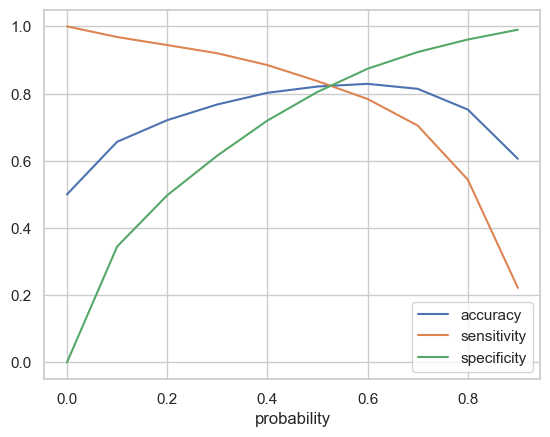

In [177]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Analysis of the above curve

Accuracy - Becomes stable around 0.6 approx

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

Hence we consider cutoff point to be 0.6

In [178]:
# Creating a column with name "predicted", which is the predicted value for 0.6 cutoff
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.01,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.11,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.18,2,1,1,0,0,0,0,0,0,0,0,0
3,0,0.01,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.54,4,1,1,1,1,1,1,0,0,0,0,0


***Evaluation Metrics***

In [179]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16606  2396]
 [ 4106 14896]]


In [180]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [181]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-",round( TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

Accuracy:- 0.83
Sensitivity:- 0.78
Specificity:- 0.87
Recall:- 0.78


📌 Here as we can see we got good accuracy, sensitivity and specificity on the train set prediction.

In [182]:
# Plotting the ROC curve.

# ROC Curve function

def PLOT_ROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

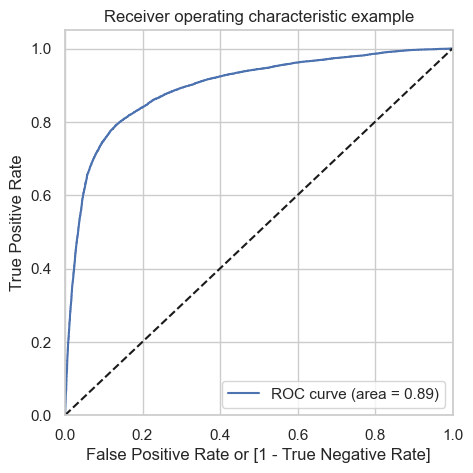

In [183]:

PLOT_ROC(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

📌 As we can see from the curve we are getting a AUC value of 0.89 which is a very good value, there by indicating that we have a good predictive model.

#### Model Performance on the test set

In [184]:
# Taking a copy of the test set
X_test_log = X_test.copy()

# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [185]:
# Predict on the test set using the FINAL MODEL i.e MODEL-2
y_test_pred = log_no_pca_6.predict(X_test_sm)

y_test_pred.head()

2722                    0.32
28720                   0.05
43175                   0.15
50024                   0.97
37809                   0.05
dtype: float64

In [186]:
# Converting y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2722,0.32
28720,0.05
43175,0.15
50024,0.97
37809,0.05


In [187]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
2722,0
28720,0
43175,0
50024,1
37809,0


In [188]:
# Putting index to Customer ID
y_test_df['CustID'] = y_test_df.index

In [189]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [190]:
# Concatinating y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

y_test_pred_final.head()

,Churn,CustID,0
0,0,2722,0.32
1,0,28720,0.05
2,0,43175,0.15
3,1,50024,0.97
4,0,37809,0.05


In [191]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

y_test_pred_final.head()

,Churn,CustID,churn_prob
0,0,2722,0.32
1,0,28720,0.05
2,0,43175,0.15
3,1,50024,0.97
4,0,37809,0.05


In [192]:
# In the test set using optimal probablity cutoff 0.6, that we considered previously.
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)

y_test_pred_final.head()

,Churn,CustID,churn_prob,test_predicted
0,0,2722,0.32,0
1,0,28720,0.05,0
2,0,43175,0.15,0
3,1,50024,0.97,1
4,0,37809,0.05,0


***EVALUATION METRICS***

In [193]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[7158  985]
 [ 189  578]]


In [194]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['test_predicted']),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))


Accuracy:- 0.87
Sensitivity:- 0.78
Specificity:- 0.87
Recall:- 0.78


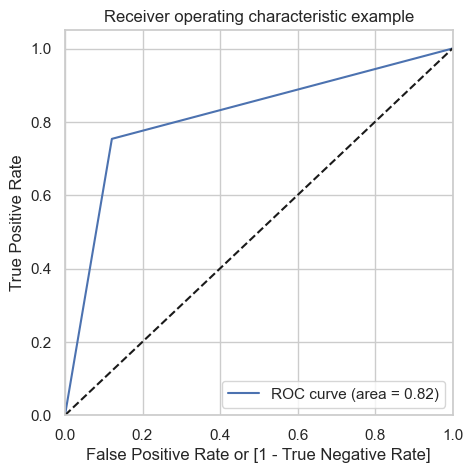

In [195]:
PLOT_ROC(y_test_pred_final['Churn'], y_test_pred_final['test_predicted'])

📌 As we can see we from the above ROC plot we get AUC of 0.76.

**Model summary** (Logistic Regression Without PCA)

-  `Train set`
  * Accuracy = 0.83
  * Sensitivity = 0.78
  * Specificity = 0.87
  * Recall = 0.78  
-  `Test set`
  * Accuracy = 0.87
  * Sensitivity = 0.78
  * Specificity = 0.87
  * Recall = 0.78

In [196]:
model_stats = pd.DataFrame(
    {'model':['Logistic Regression with PCA','Decision Tree with PCA','Random Forest with PCA','Logistic without PCA'],

    'Recall':       [0.87,0.89,0.70,0.82],
    'Test accuracy':     [0.83,0.83,0.87,0.79],
    'Roc_auc_score':[0.88,0.77,0.88,0.76],
    })

model_stats.sort_values(by=['Recall','Test accuracy','Roc_auc_score'],ascending=False)

,model,Recall,Test accuracy,Roc_auc_score
1,Decision Tree with PCA,0.89,0.83,0.77
0,Logistic Regression with PCA,0.87,0.83,0.88
3,Logistic without PCA,0.82,0.79,0.76
2,Random Forest with PCA,0.70,0.87,0.88


In [197]:
features = dt_pca_model.feature_importances_
cols =[X.iloc[:,sorted(range(len(features)), key=lambda i: features[i])[-10:]].columns]

cols


[Index(['onnet_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2t_mou_7', 'roam_ic_mou_7',
        'onnet_mou_7', 'arpu_7', 'loc_og_t2c_mou_7', 'onnet_mou_8',
        'roam_og_mou_8', 'arpu_6'],
       dtype='object')]

In [198]:
Imp_Features=pd.DataFrame({'FEATURES':['loc_og_t2m_mou_7', 'total_og_mou_6', 'loc_og_t2t_mou_7',
        'roam_ic_mou_7', 'onnet_mou_7', 'arpu_7', 'loc_og_t2c_mou_7',
        'onnet_mou_8', 'roam_og_mou_8', 'arpu_6']})
Imp_Features

,FEATURES
0,loc_og_t2m_mou_7
1,total_og_mou_6
2,loc_og_t2t_mou_7
3,roam_ic_mou_7
4,onnet_mou_7
5,arpu_7
6,loc_og_t2c_mou_7
7,onnet_mou_8
8,roam_og_mou_8
9,arpu_6


     ******************************************************

# Conclusion and STRATEGY ahead

1. From EDA, we observed that there is considerable drop in recharge, call usage and data usage in the 8th month which is the  `Action Phase`. Below are the important features:<br>
- loc_og_t2m_mou_7
- total_og_mou_6
- loc_og_t2t_mou_7
- roam_ic_mou_7
- onnet_mou_7
- arpu_7
- loc_og_t2c_mou_7
- onnet_mou_8
- roam_og_mou_8
- arpu_6

2. Average revenue per user in the `7th month` plays a vital role in deciding churn. A sudden drop in it might indicate that the customer might be thinking about churning and appropriate actions should be taken.<br>

3. Local Minutes of usage (outgoing) are the most affecting features on the customer churn.<br>

4. Roaming Minutes of usage (incoming & outgoing) are also affecting features on the customer churn.<br>

5. Toal minutes of usage for outgoing is also an important factor affecting the churn.


Following strategies can be incorporated :<br>

 - Sudden drop in Local Minutes of usage might be because of the unsatisfactory customer service or because of poor network or unsuitable customer schemes/plans. Efforts shall be made to provide better network and focus on customer satisfaction.
 - Based on the usage / last recharge/ onnet usage, routine feedback calls should be made for customer satisfaction and services that can understand their grievances & expectations. Appropriate action should be taken to avoid them from churning.
 - Various attractive offers can be introduced to customers showing sudden drop in total amount spent on calls & data recharge in the action phase  to lure them.
 - Customised plans should be provided to such customers to stop them from churning.
 - Promotional offers can also be very helpful